In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStaticDetection, nets
from NEATModels.Staticconfig  import StaticNeatConfig
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [2]:
NpzDirectory = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2OYoloneatV1/'
TrainModelName = 'S54bin2V1.npz'
ValidationModelName = 'S54bin2V1Val.npz'


ModelDir = '/data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/'
#Model name based on wether it is residual or sequntial ONEAT network
Model_Name = 'OSnetbin2d38V1f48.h5'
StaticCategoriesJson = ModelDir + 'StaticCategories.json'
KeyCategories = load_json(StaticCategoriesJson)

StaticCordJson = ModelDir + 'StaticCord.json'
KeyCord = load_json(StaticCordJson)

#Neural network parameters





In [3]:
#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 3
mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 38
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yoloV0 = False
ImageX = 54
ImageY = 54
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 5

In [4]:
config = StaticNeatConfig(residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, gridX = 1, gridY = 1, ImageX = ImageX, ImageY = ImageY, nboxes = nboxes, 
                         epochs = epochs, categories = len(KeyCategories), box_vector = len(KeyCord), learning_rate = learning_rate,
                         batch_size = batch_size, ModelName = Model_Name, multievent = multievent)

config_json = config.to_json()
show = True
print(config)
save_json(config_json, ModelDir + Model_Name + '_Parameter.json')

StaticNeatConfig(ImageX=54, ImageY=54, ModelName='OSnetbin2d38V1f48.h5', batch_size=100, box_vector=5, categories=4, depth=38, epochs=250, gridX=1, gridY=1, learning_rate=1e-06, mid_kernel=3, multievent=False, nboxes=5, residual=False, start_kernel=3, startfilter=32)


number of  images:	 36076
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
number of  images:	 1899
image size (2D):		 (54, 54)
axes:				 SXYC
channels in / out:		 1
(36076, 1, 1, 9)
(36076, 1, 1, 29) 5














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]                   
________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36076 samples, validate on 1899 samples
Epoch 1/250
36076/36076 [==============================] - 27s 735us/step - loss: 2.4695 - acc: 3.0491e-04 - val_loss: 2.3583 - val_acc: 0.0000e+00

Epoch 00001: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 2.3583106258908595, 'val_acc': 0.0, 'loss': 2.469492038954572, 'acc': 0.00030491184593998337, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

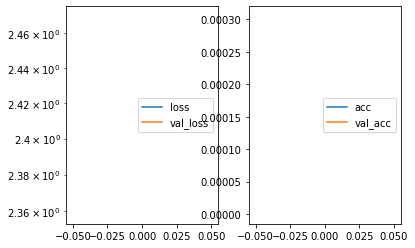

Predicted cell: Normal Probability: [[0.39250487]]
True Cell type: MacroCheate
X [[0.6014958]]
True positional value X 0.6851851851851852
Y [[0.32628733]]
True positional value Y 0.3148148148148148
H [[0.49231267]]
True positional value H 0.5
W [[0.50131404]]
True positional value W 0.9444444444444444
C [[0.5928868]]
True positional value C 1.0


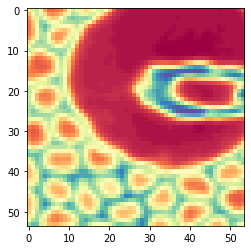

Epoch 2/250
36076/36076 [==============================] - 22s 598us/step - loss: 2.2518 - acc: 7.4842e-04 - val_loss: 2.2207 - val_acc: 0.0026

Epoch 00002: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 2.220715549633715, 'val_acc': 0.0026329646594214274, 'loss': 2.25179641635921, 'acc': 0.0007484199854890501, 'lr': 1e-06}


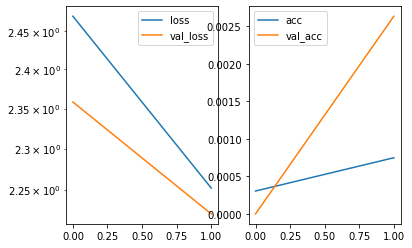

Predicted cell: MatureP1 Probability: [[0.5524805]]
True Cell type: MacroCheate
X [[0.32260075]]
True positional value X 0.5
Y [[0.6071484]]
True positional value Y 0.6851851851851852
H [[0.4260257]]
True positional value H 0.42592592592592593
W [[0.48784572]]
True positional value W 0.4444444444444444
C [[0.54253685]]
True positional value C 1.0


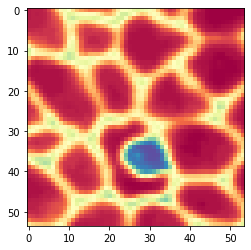

Epoch 3/250
36076/36076 [==============================] - 22s 601us/step - loss: 2.1194 - acc: 0.0022 - val_loss: 2.1052 - val_acc: 0.0058

Epoch 00003: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 2.1051974060536685, 'val_acc': 0.005792522250727141, 'loss': 2.1193523044292224, 'acc': 0.002217540698571432, 'lr': 1e-06}


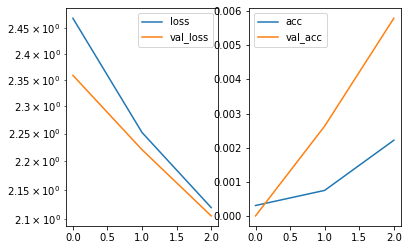

Predicted cell: MacroCheate Probability: [[0.30690894]]
True Cell type: MatureP1
X [[0.50362676]]
True positional value X 0.6851851851851852
Y [[0.48812008]]
True positional value Y 0.5
H [[0.4790863]]
True positional value H 0.5555555555555556
W [[0.47849578]]
True positional value W 0.4444444444444444
C [[0.6215062]]
True positional value C 1.0


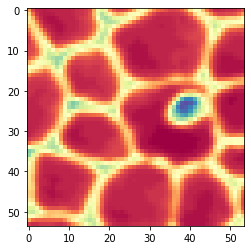

Epoch 4/250
36076/36076 [==============================] - 22s 599us/step - loss: 2.0089 - acc: 0.0044 - val_loss: 2.0081 - val_acc: 0.0105

Epoch 00004: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 2.0081385393529394, 'val_acc': 0.010531858648965551, 'loss': 2.0088703801936196, 'acc': 0.00440736213676885, 'lr': 1e-06}


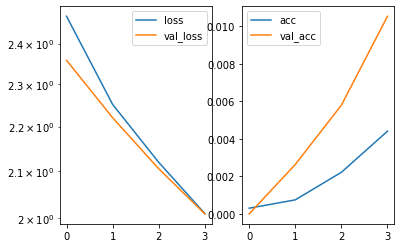

Predicted cell: MacroCheate Probability: [[0.36754704]]
True Cell type: NonMatureP1
X [[0.47321525]]
True positional value X 0.6851851851851852
Y [[0.41395327]]
True positional value Y 0.5
H [[0.36560443]]
True positional value H 0.4444444444444444
W [[0.5469208]]
True positional value W 0.3333333333333333
C [[0.5580573]]
True positional value C 1.0


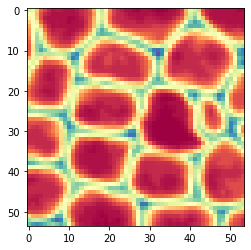

Epoch 5/250
36076/36076 [==============================] - 22s 599us/step - loss: 1.9132 - acc: 0.0093 - val_loss: 1.9269 - val_acc: 0.0169

Epoch 00005: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.9269283793360512, 'val_acc': 0.016850973929662557, 'loss': 1.9131700413918888, 'acc': 0.00925823241907598, 'lr': 1e-06}


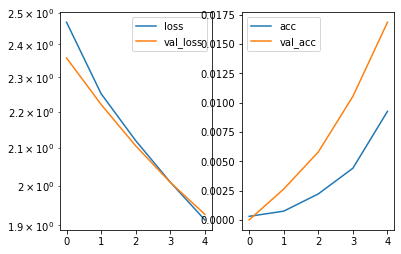

Predicted cell: MatureP1 Probability: [[0.33972162]]
True Cell type: Normal
X [[0.366194]]
True positional value X 0.5
Y [[0.5287756]]
True positional value Y 0.5
H [[0.48646662]]
True positional value H 0.35185185185185186
W [[0.5154406]]
True positional value W 0.4074074074074074
C [[0.57072854]]
True positional value C 1.0


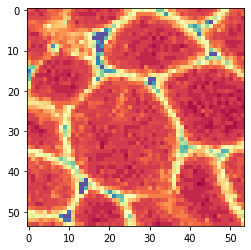

Epoch 6/250
36076/36076 [==============================] - 22s 597us/step - loss: 1.8276 - acc: 0.0144 - val_loss: 1.8493 - val_acc: 0.0211

Epoch 00006: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.8492999683247546, 'val_acc': 0.021063717373457, 'loss': 1.8275923014665234, 'acc': 0.014441733794892584, 'lr': 1e-06}


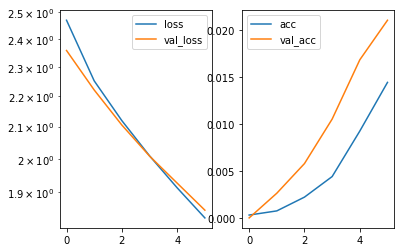

Predicted cell: MacroCheate Probability: [[0.7752041]]
True Cell type: MacroCheate
X [[0.50854295]]
True positional value X 0.6851851851851852
Y [[0.40914658]]
True positional value Y 0.6851851851851852
H [[0.45149022]]
True positional value H 0.2962962962962963
W [[0.4611369]]
True positional value W 0.3333333333333333
C [[0.5954949]]
True positional value C 1.0


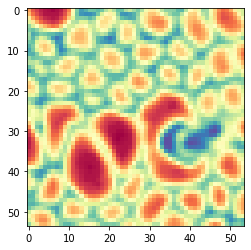

Epoch 7/250
36076/36076 [==============================] - 21s 594us/step - loss: 1.7502 - acc: 0.0204 - val_loss: 1.7837 - val_acc: 0.0284

Epoch 00007: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.7836719085317716, 'val_acc': 0.028436018616008155, 'loss': 1.7502050214337725, 'acc': 0.02040137449236677, 'lr': 1e-06}


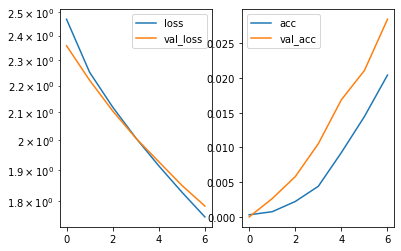

Predicted cell: MatureP1 Probability: [[0.42820832]]
True Cell type: MatureP1
X [[0.35046667]]
True positional value X 0.3148148148148148
Y [[0.6461315]]
True positional value Y 0.6851851851851852
H [[0.53489625]]
True positional value H 0.42592592592592593
W [[0.45877013]]
True positional value W 0.3333333333333333
C [[0.5600983]]
True positional value C 1.0


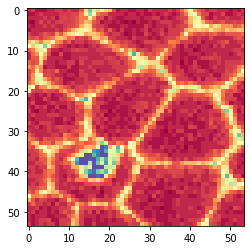

Epoch 8/250
36076/36076 [==============================] - 21s 592us/step - loss: 1.6841 - acc: 0.0272 - val_loss: 1.7202 - val_acc: 0.0337

Epoch 00008: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.7202173347784508, 'val_acc': 0.033701947848045276, 'loss': 1.6840840648000184, 'acc': 0.027192592967810895, 'lr': 1e-06}


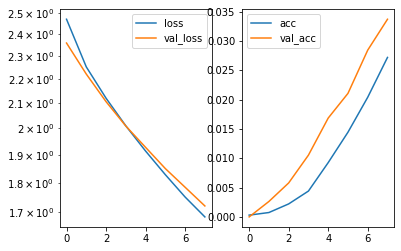

Predicted cell: MatureP1 Probability: [[0.47900125]]
True Cell type: MatureP1
X [[0.3166827]]
True positional value X 0.3148148148148148
Y [[0.5846674]]
True positional value Y 0.6851851851851852
H [[0.45416185]]
True positional value H 0.4074074074074074
W [[0.45490032]]
True positional value W 0.4074074074074074
C [[0.49403834]]
True positional value C 1.0


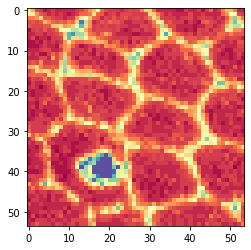

Epoch 9/250
36076/36076 [==============================] - 21s 593us/step - loss: 1.6209 - acc: 0.0320 - val_loss: 1.6632 - val_acc: 0.0342

Epoch 00009: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.6631687843153011, 'val_acc': 0.0342285407912094, 'loss': 1.620939492161568, 'acc': 0.0319880248268496, 'lr': 1e-06}


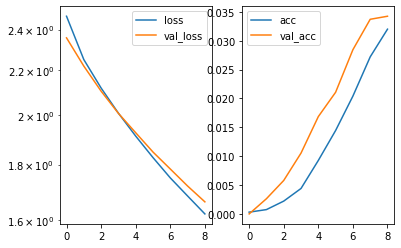

Predicted cell: NonMatureP1 Probability: [[0.32189637]]
True Cell type: NonMatureP1
X [[0.3554313]]
True positional value X 0.6851851851851852
Y [[0.5512257]]
True positional value Y 0.3148148148148148
H [[0.41118985]]
True positional value H 0.3333333333333333
W [[0.5339732]]
True positional value W 0.3888888888888889
C [[0.67469615]]
True positional value C 1.0


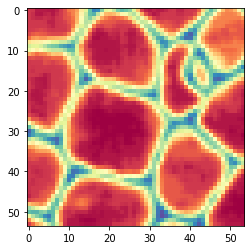

Epoch 10/250
36076/36076 [==============================] - 22s 597us/step - loss: 1.5658 - acc: 0.0382 - val_loss: 1.6113 - val_acc: 0.0390

Epoch 00010: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.6112518974703949, 'val_acc': 0.03896787772842807, 'loss': 1.5657901507230751, 'acc': 0.03816941965089258, 'lr': 1e-06}


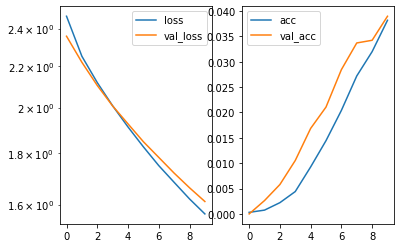

Predicted cell: Normal Probability: [[0.533578]]
True Cell type: NonMatureP1
X [[0.40496656]]
True positional value X 0.3148148148148148
Y [[0.51680106]]
True positional value Y 0.6851851851851852
H [[0.47032726]]
True positional value H 0.2777777777777778
W [[0.52227384]]
True positional value W 0.2777777777777778
C [[0.5018629]]
True positional value C 1.0


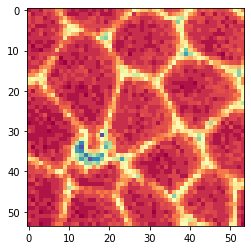

Epoch 11/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.5147 - acc: 0.0426 - val_loss: 1.5610 - val_acc: 0.0379

Epoch 00011: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.5609672145507034, 'val_acc': 0.03791469176657392, 'loss': 1.5146983329783734, 'acc': 0.042632220411465215, 'lr': 1e-06}


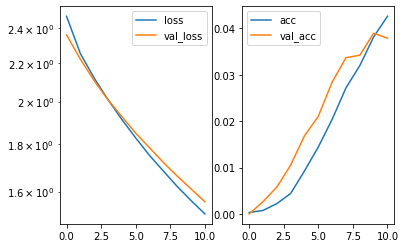

Predicted cell: Normal Probability: [[0.49639425]]
True Cell type: Normal
X [[0.47481903]]
True positional value X 0.5
Y [[0.56877065]]
True positional value Y 0.5
H [[0.37346762]]
True positional value H 0.3148148148148148
W [[0.49053377]]
True positional value W 0.35185185185185186
C [[0.52872133]]
True positional value C 1.0


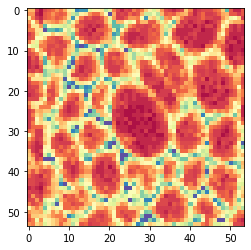

Epoch 12/250
36076/36076 [==============================] - 22s 600us/step - loss: 1.4656 - acc: 0.0454 - val_loss: 1.5151 - val_acc: 0.0411

Epoch 00012: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.5151357623135937, 'val_acc': 0.04107424932060711, 'loss': 1.4655967085334252, 'acc': 0.04543186573402351, 'lr': 1e-06}


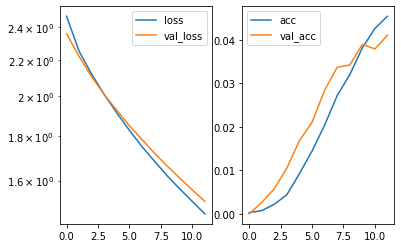

Predicted cell: MacroCheate Probability: [[0.46535414]]
True Cell type: MatureP1
X [[0.2520395]]
True positional value X 0.3148148148148148
Y [[0.49603802]]
True positional value Y 0.6851851851851852
H [[0.37851453]]
True positional value H 0.2962962962962963
W [[0.48248973]]
True positional value W 0.2962962962962963
C [[0.5521275]]
True positional value C 1.0


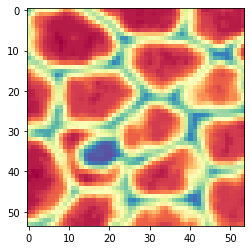

Epoch 13/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.4215 - acc: 0.0509 - val_loss: 1.4729 - val_acc: 0.0432

Epoch 00013: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.4729444300142824, 'val_acc': 0.04318062110895731, 'loss': 1.4214799015151118, 'acc': 0.05089255990502853, 'lr': 1e-06}


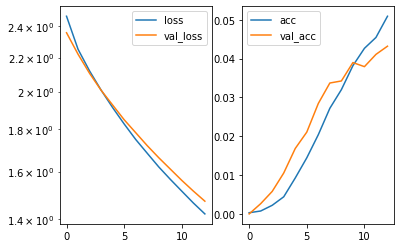

Predicted cell: MatureP1 Probability: [[0.5222394]]
True Cell type: MatureP1
X [[0.466676]]
True positional value X 0.3148148148148148
Y [[0.4701346]]
True positional value Y 0.5
H [[0.43827695]]
True positional value H 0.25925925925925924
W [[0.5058005]]
True positional value W 0.24074074074074073
C [[0.5410558]]
True positional value C 1.0


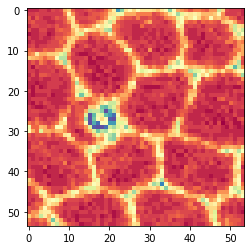

Epoch 14/250
36076/36076 [==============================] - 21s 596us/step - loss: 1.3806 - acc: 0.0527 - val_loss: 1.4337 - val_acc: 0.0453

Epoch 00014: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.4337051855758216, 'val_acc': 0.04528699244415214, 'loss': 1.3805972686005823, 'acc': 0.05266659249792092, 'lr': 1e-06}


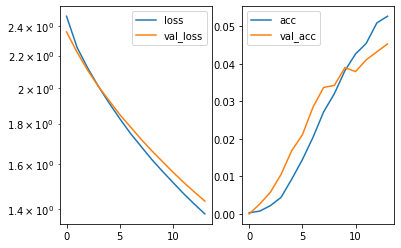

Predicted cell: MatureP1 Probability: [[0.49007565]]
True Cell type: Normal
X [[0.4451126]]
True positional value X 0.5
Y [[0.45244986]]
True positional value Y 0.5
H [[0.5057744]]
True positional value H 0.46296296296296297
W [[0.47668982]]
True positional value W 0.35185185185185186
C [[0.5563859]]
True positional value C 1.0


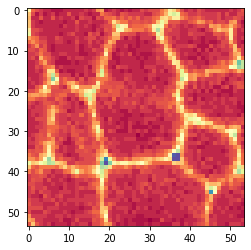

Epoch 15/250
36076/36076 [==============================] - 21s 593us/step - loss: 1.3420 - acc: 0.0562 - val_loss: 1.3970 - val_acc: 0.0474

Epoch 00015: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.397045797960202, 'val_acc': 0.047393364797475274, 'loss': 1.3419695153629216, 'acc': 0.05615921910781562, 'lr': 1e-06}


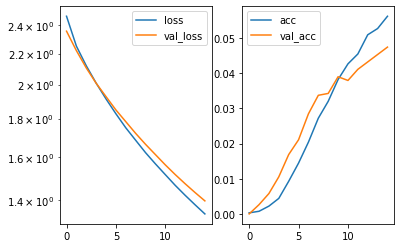

Predicted cell: MacroCheate Probability: [[0.49846584]]
True Cell type: MatureP1
X [[0.49809712]]
True positional value X 0.5
Y [[0.57043654]]
True positional value Y 0.5
H [[0.4842165]]
True positional value H 0.46296296296296297
W [[0.42011845]]
True positional value W 0.42592592592592593
C [[0.5864475]]
True positional value C 1.0


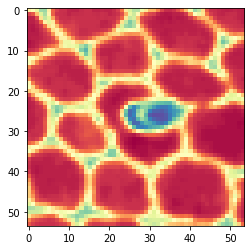

Epoch 16/250
36076/36076 [==============================] - 22s 597us/step - loss: 1.3052 - acc: 0.0595 - val_loss: 1.3625 - val_acc: 0.0474

Epoch 00016: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.3625446372185337, 'val_acc': 0.047393364993646436, 'loss': 1.3051980582530252, 'acc': 0.05945781097253895, 'lr': 1e-06}


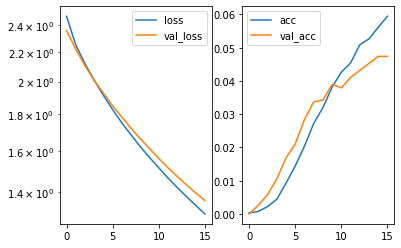

Predicted cell: MacroCheate Probability: [[0.55971926]]
True Cell type: MatureP1
X [[0.4907815]]
True positional value X 0.5
Y [[0.4663478]]
True positional value Y 0.3148148148148148
H [[0.4460016]]
True positional value H 0.3333333333333333
W [[0.4911848]]
True positional value W 0.3333333333333333
C [[0.6818373]]
True positional value C 1.0


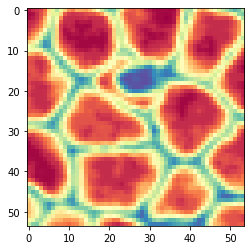

Epoch 17/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.2735 - acc: 0.0642 - val_loss: 1.3302 - val_acc: 0.0532

Epoch 00017: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.3302403448631162, 'val_acc': 0.05318588710901548, 'loss': 1.2734992819623336, 'acc': 0.06419780439013506, 'lr': 1e-06}


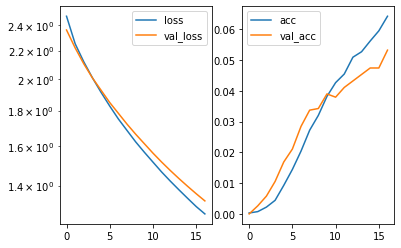

Predicted cell: Normal Probability: [[0.47735646]]
True Cell type: Normal
X [[0.3728431]]
True positional value X 0.5
Y [[0.48775452]]
True positional value Y 0.5
H [[0.3999592]]
True positional value H 0.2962962962962963
W [[0.4792905]]
True positional value W 0.46296296296296297
C [[0.55375314]]
True positional value C 1.0


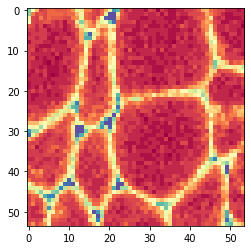

Epoch 18/250
36076/36076 [==============================] - 21s 596us/step - loss: 1.2404 - acc: 0.0660 - val_loss: 1.3006 - val_acc: 0.0569

Epoch 00018: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.3005647081773868, 'val_acc': 0.05687203769105682, 'loss': 1.2404013236645703, 'acc': 0.06599955633551144, 'lr': 1e-06}


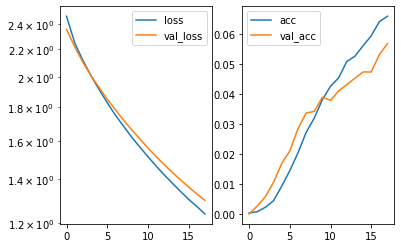

Predicted cell: MacroCheate Probability: [[0.6330704]]
True Cell type: MacroCheate
X [[0.5324783]]
True positional value X 0.5
Y [[0.32362825]]
True positional value Y 0.3148148148148148
H [[0.43529928]]
True positional value H 0.18518518518518517
W [[0.39166328]]
True positional value W 0.18518518518518517
C [[0.7600955]]
True positional value C 0.0


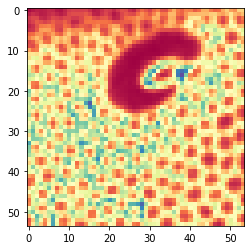

Epoch 19/250
36076/36076 [==============================] - 22s 596us/step - loss: 1.2131 - acc: 0.0707 - val_loss: 1.2722 - val_acc: 0.0553

Epoch 00019: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.2722255360019277, 'val_acc': 0.05529225864038146, 'loss': 1.2131125633937845, 'acc': 0.07073954977231434, 'lr': 1e-06}


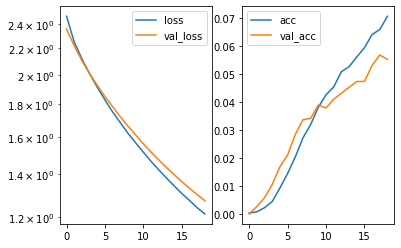

Predicted cell: MatureP1 Probability: [[0.75297415]]
True Cell type: MacroCheate
X [[0.41119087]]
True positional value X 0.3148148148148148
Y [[0.5649547]]
True positional value Y 0.5
H [[0.54521906]]
True positional value H 0.5
W [[0.49430773]]
True positional value W 0.37037037037037035
C [[0.7028899]]
True positional value C 1.0


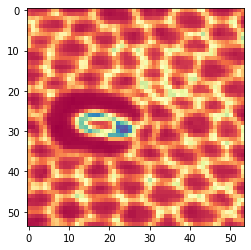

Epoch 20/250
36076/36076 [==============================] - 21s 594us/step - loss: 1.1847 - acc: 0.0736 - val_loss: 1.2437 - val_acc: 0.0574

Epoch 00020: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.243722248793025, 'val_acc': 0.05739863046600418, 'loss': 1.1846755737078825, 'acc': 0.07359463360137046, 'lr': 1e-06}


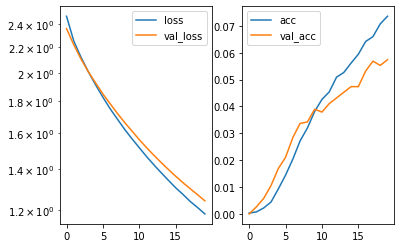

Predicted cell: MacroCheate Probability: [[0.9895717]]
True Cell type: MacroCheate
X [[0.4672361]]
True positional value X 0.3148148148148148
Y [[0.27217203]]
True positional value Y 0.3148148148148148
H [[0.3046453]]
True positional value H 0.5185185185185185
W [[0.43466622]]
True positional value W 0.5
C [[0.67398894]]
True positional value C 1.0


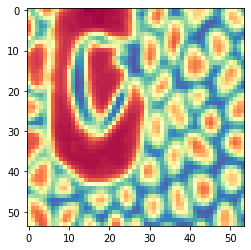

Epoch 21/250
36076/36076 [==============================] - 21s 594us/step - loss: 1.1561 - acc: 0.0776 - val_loss: 1.2181 - val_acc: 0.0621

Epoch 00021: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.218060785371922, 'val_acc': 0.06213796695104833, 'loss': 1.1561172690739427, 'acc': 0.07761392634465658, 'lr': 1e-06}


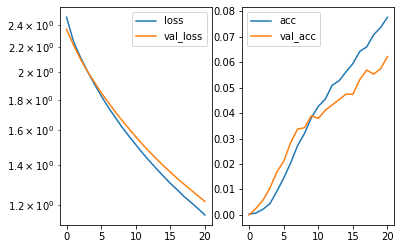

Predicted cell: MatureP1 Probability: [[0.79130644]]
True Cell type: MatureP1
X [[0.433636]]
True positional value X 0.3148148148148148
Y [[0.41031998]]
True positional value Y 0.5
H [[0.4630572]]
True positional value H 0.2777777777777778
W [[0.46612558]]
True positional value W 0.2777777777777778
C [[0.606047]]
True positional value C 1.0


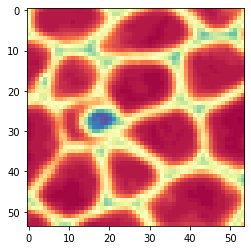

Epoch 22/250
36076/36076 [==============================] - 21s 592us/step - loss: 1.1309 - acc: 0.0809 - val_loss: 1.1925 - val_acc: 0.0732

Epoch 00022: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.1924515049227795, 'val_acc': 0.07319641879918137, 'loss': 1.1308674658332172, 'acc': 0.0809402372578597, 'lr': 1e-06}


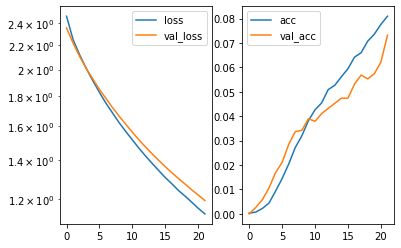

Predicted cell: MatureP1 Probability: [[0.4960434]]
True Cell type: MatureP1
X [[0.41967148]]
True positional value X 0.6851851851851852
Y [[0.70805293]]
True positional value Y 0.6851851851851852
H [[0.36566722]]
True positional value H 0.2222222222222222
W [[0.44460392]]
True positional value W 0.18518518518518517
C [[0.58301425]]
True positional value C 1.0


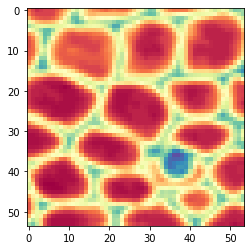

Epoch 23/250
36076/36076 [==============================] - 21s 594us/step - loss: 1.1087 - acc: 0.0901 - val_loss: 1.1689 - val_acc: 0.0790

Epoch 00023: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.16887350757854, 'val_acc': 0.07898894095182293, 'loss': 1.1086870744231272, 'acc': 0.09011531211493622, 'lr': 1e-06}


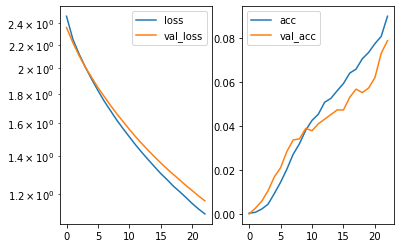

Predicted cell: MacroCheate Probability: [[0.70063835]]
True Cell type: MacroCheate
X [[0.5980125]]
True positional value X 0.5
Y [[0.4447016]]
True positional value Y 0.3148148148148148
H [[0.30806667]]
True positional value H 0.5740740740740741
W [[0.5642967]]
True positional value W 0.6296296296296297
C [[0.6860264]]
True positional value C 1.0


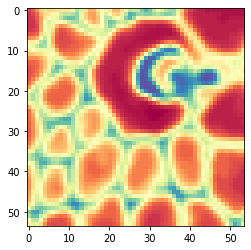

Epoch 24/250
36076/36076 [==============================] - 21s 593us/step - loss: 1.0848 - acc: 0.0939 - val_loss: 1.1451 - val_acc: 0.0858

Epoch 00024: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.1450550886378155, 'val_acc': 0.08583464965483212, 'loss': 1.0848271910678204, 'acc': 0.09385741219211179, 'lr': 1e-06}


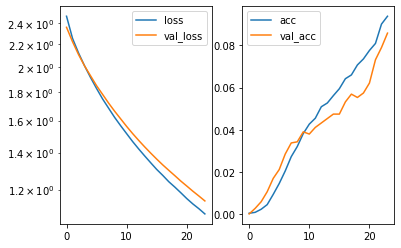

Predicted cell: Normal Probability: [[0.33561864]]
True Cell type: MacroCheate
X [[0.26182753]]
True positional value X 0.5
Y [[0.4976266]]
True positional value Y 0.6851851851851852
H [[0.46725398]]
True positional value H 0.18518518518518517
W [[0.40522534]]
True positional value W 0.18518518518518517
C [[0.7120656]]
True positional value C 0.0


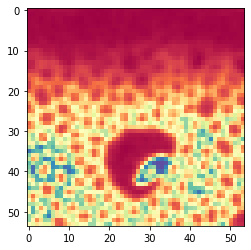

Epoch 25/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.0644 - acc: 0.1033 - val_loss: 1.1247 - val_acc: 0.0953

Epoch 00025: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.1247415864637114, 'val_acc': 0.09531332307611408, 'loss': 1.064426606345671, 'acc': 0.10330967964301525, 'lr': 1e-06}


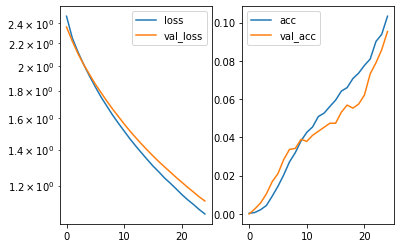

Predicted cell: Normal Probability: [[0.5438552]]
True Cell type: Normal
X [[0.49923956]]
True positional value X 0.5
Y [[0.5665858]]
True positional value Y 0.5
H [[0.5108897]]
True positional value H 0.4074074074074074
W [[0.5802996]]
True positional value W 0.42592592592592593
C [[0.5257936]]
True positional value C 1.0


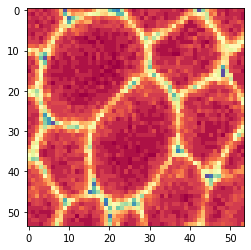

Epoch 26/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.0434 - acc: 0.1119 - val_loss: 1.1038 - val_acc: 0.1016

Epoch 00026: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.1037851105620198, 'val_acc': 0.10163243904341014, 'loss': 1.0433994124794577, 'acc': 0.11193036913048972, 'lr': 1e-06}


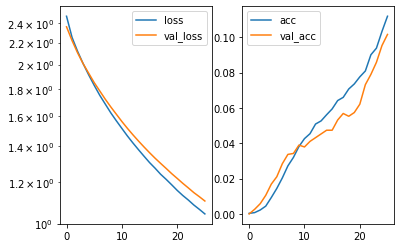

Predicted cell: MacroCheate Probability: [[0.7649506]]
True Cell type: MacroCheate
X [[0.38321993]]
True positional value X 0.3148148148148148
Y [[0.6359874]]
True positional value Y 0.5
H [[0.5204177]]
True positional value H 0.5185185185185185
W [[0.3440324]]
True positional value W 0.46296296296296297
C [[0.7309443]]
True positional value C 1.0


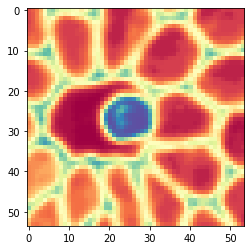

Epoch 27/250
36076/36076 [==============================] - 22s 598us/step - loss: 1.0251 - acc: 0.1202 - val_loss: 1.0845 - val_acc: 0.1111

Epoch 00027: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.084496750776362, 'val_acc': 0.11111111246861553, 'loss': 1.025110886232831, 'acc': 0.12024614694447221, 'lr': 1e-06}


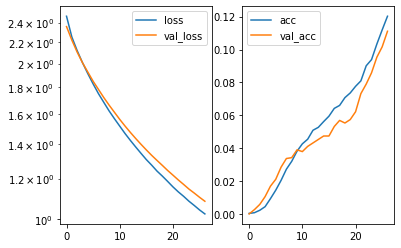

Predicted cell: Normal Probability: [[0.50462186]]
True Cell type: NonMatureP1
X [[0.5023095]]
True positional value X 0.3148148148148148
Y [[0.57208014]]
True positional value Y 0.6851851851851852
H [[0.3739408]]
True positional value H 0.2962962962962963
W [[0.48111427]]
True positional value W 0.2222222222222222
C [[0.53606164]]
True positional value C 1.0


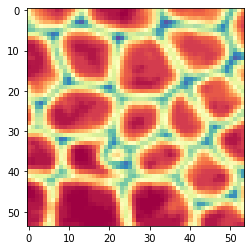

Epoch 28/250
36076/36076 [==============================] - 21s 595us/step - loss: 1.0054 - acc: 0.1282 - val_loss: 1.0654 - val_acc: 0.1259

Epoch 00028: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.065440052367939, 'val_acc': 0.12585571350205127, 'loss': 1.005356680574987, 'acc': 0.12822929356911783, 'lr': 1e-06}


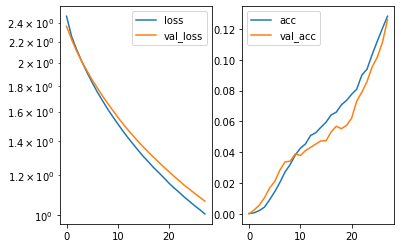

Predicted cell: MacroCheate Probability: [[0.39976263]]
True Cell type: MacroCheate
X [[0.36094362]]
True positional value X 0.3148148148148148
Y [[0.592819]]
True positional value Y 0.5
H [[0.5071846]]
True positional value H 0.46296296296296297
W [[0.47300884]]
True positional value W 0.5555555555555556
C [[0.75791293]]
True positional value C 1.0


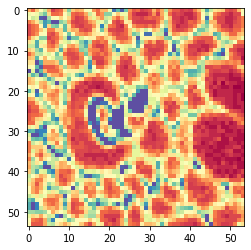

Epoch 29/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.9870 - acc: 0.1401 - val_loss: 1.0493 - val_acc: 0.1280

Epoch 00029: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.0493168052464426, 'val_acc': 0.12796208562193073, 'loss': 0.9870005925395084, 'acc': 0.14006541761974364, 'lr': 1e-06}


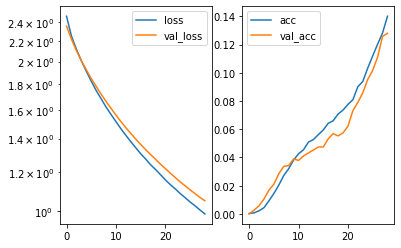

Predicted cell: MatureP1 Probability: [[0.8241759]]
True Cell type: MatureP1
X [[0.296868]]
True positional value X 0.3148148148148148
Y [[0.6736928]]
True positional value Y 0.6851851851851852
H [[0.33764943]]
True positional value H 0.42592592592592593
W [[0.4972049]]
True positional value W 0.37037037037037035
C [[0.5525404]]
True positional value C 1.0


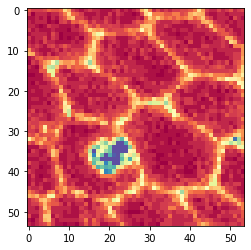

Epoch 30/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.9701 - acc: 0.1489 - val_loss: 1.0296 - val_acc: 0.1380

Epoch 00030: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.0295668550388886, 'val_acc': 0.13796735166906995, 'loss': 0.9701120458416908, 'acc': 0.1489078613541907, 'lr': 1e-06}


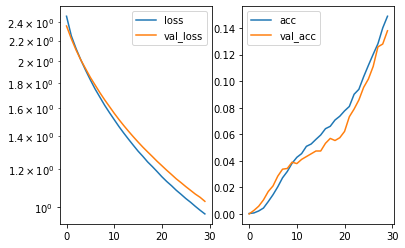

Predicted cell: Normal Probability: [[0.794879]]
True Cell type: Normal
X [[0.46689087]]
True positional value X 0.5
Y [[0.5178155]]
True positional value Y 0.5
H [[0.42701435]]
True positional value H 0.3333333333333333
W [[0.53012776]]
True positional value W 0.42592592592592593
C [[0.64015305]]
True positional value C 1.0


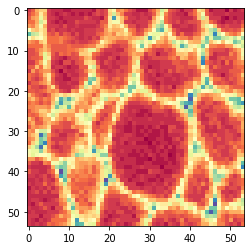

Epoch 31/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.9558 - acc: 0.1607 - val_loss: 1.0125 - val_acc: 0.1490

Epoch 00031: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 1.0125297366976425, 'val_acc': 0.14902580274821206, 'loss': 0.9557909321092373, 'acc': 0.16071626605501738, 'lr': 1e-06}


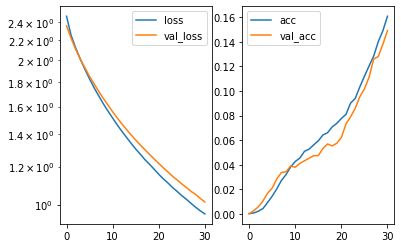

Predicted cell: NonMatureP1 Probability: [[0.569524]]
True Cell type: NonMatureP1
X [[0.3993602]]
True positional value X 0.5
Y [[0.54053986]]
True positional value Y 0.5
H [[0.4440752]]
True positional value H 0.3333333333333333
W [[0.47353005]]
True positional value W 0.4074074074074074
C [[0.5428982]]
True positional value C 1.0


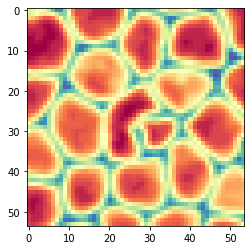

Epoch 32/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.9391 - acc: 0.1726 - val_loss: 0.9976 - val_acc: 0.1606

Epoch 00032: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.9975712290558456, 'val_acc': 0.16061084913290946, 'loss': 0.9391382179988278, 'acc': 0.17260782809231864, 'lr': 1e-06}


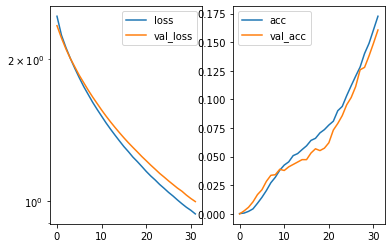

Predicted cell: MatureP1 Probability: [[0.690501]]
True Cell type: MatureP1
X [[0.4715724]]
True positional value X 0.5
Y [[0.60863733]]
True positional value Y 0.6851851851851852
H [[0.5188108]]
True positional value H 0.25925925925925924
W [[0.38314894]]
True positional value W 0.24074074074074073
C [[0.47788176]]
True positional value C 1.0


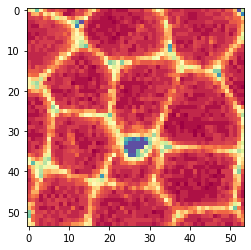

Epoch 33/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.9229 - acc: 0.1848 - val_loss: 0.9807 - val_acc: 0.1780

Epoch 00033: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.980707213902486, 'val_acc': 0.177988415394663, 'loss': 0.9228624727142031, 'acc': 0.1848043018671345, 'lr': 1e-06}


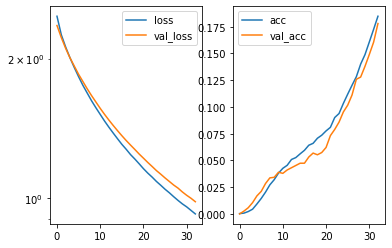

Predicted cell: MacroCheate Probability: [[0.4601704]]
True Cell type: MacroCheate
X [[0.52258897]]
True positional value X 0.6851851851851852
Y [[0.5861582]]
True positional value Y 0.6851851851851852
H [[0.471555]]
True positional value H 0.48148148148148145
W [[0.37177062]]
True positional value W 0.46296296296296297
C [[0.55836177]]
True positional value C 1.0


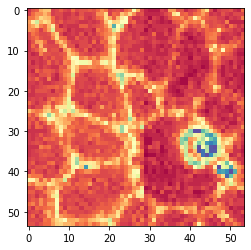

Epoch 34/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.9085 - acc: 0.1966 - val_loss: 0.9648 - val_acc: 0.1901

Epoch 00034: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.9647599520841481, 'val_acc': 0.19010005226695204, 'loss': 0.9085436222201402, 'acc': 0.19655726777336155, 'lr': 1e-06}


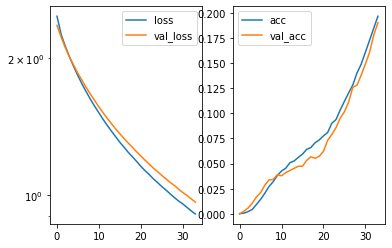

Predicted cell: Normal Probability: [[0.7068773]]
True Cell type: Normal
X [[0.49766144]]
True positional value X 0.5
Y [[0.49575126]]
True positional value Y 0.5
H [[0.44923866]]
True positional value H 0.48148148148148145
W [[0.4302513]]
True positional value W 0.4074074074074074
C [[0.5871754]]
True positional value C 1.0


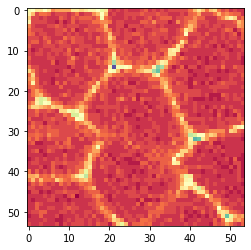

Epoch 35/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.8931 - acc: 0.2079 - val_loss: 0.9505 - val_acc: 0.2038

Epoch 00035: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.950543935076697, 'val_acc': 0.2037914685508714, 'loss': 0.8930591541246506, 'acc': 0.20792216436768307, 'lr': 1e-06}


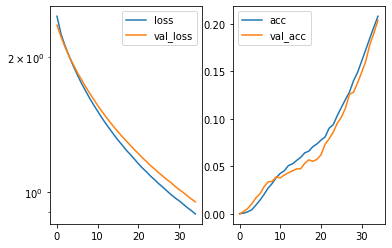

Predicted cell: MatureP1 Probability: [[0.62925535]]
True Cell type: MatureP1
X [[0.4991155]]
True positional value X 0.6851851851851852
Y [[0.59647864]]
True positional value Y 0.6851851851851852
H [[0.4332795]]
True positional value H 0.18518518518518517
W [[0.42836565]]
True positional value W 0.18518518518518517
C [[0.5300999]]
True positional value C 0.0


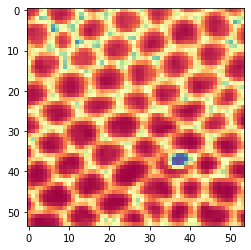

Epoch 36/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.8820 - acc: 0.2247 - val_loss: 0.9364 - val_acc: 0.2170

Epoch 00036: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.9363911691749014, 'val_acc': 0.21695629344481177, 'loss': 0.8820388400048423, 'acc': 0.22469231599248132, 'lr': 1e-06}


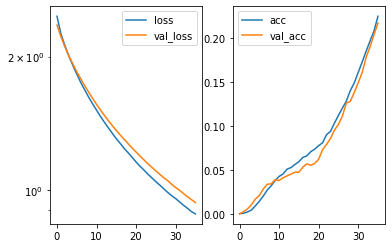

Predicted cell: MatureP1 Probability: [[0.8032249]]
True Cell type: MacroCheate
X [[0.49606788]]
True positional value X 0.5
Y [[0.4240086]]
True positional value Y 0.5
H [[0.4555393]]
True positional value H 0.3333333333333333
W [[0.51275134]]
True positional value W 0.4444444444444444
C [[0.7394005]]
True positional value C 1.0


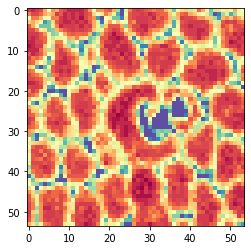

Epoch 37/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.8688 - acc: 0.2405 - val_loss: 0.9233 - val_acc: 0.2259

Epoch 00037: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.9233079962883578, 'val_acc': 0.22590837279641673, 'loss': 0.8687519714961573, 'acc': 0.2404922936592891, 'lr': 1e-06}


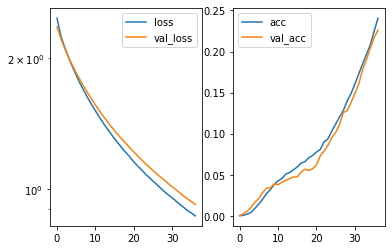

Predicted cell: MatureP1 Probability: [[0.6345521]]
True Cell type: MatureP1
X [[0.46011463]]
True positional value X 0.6851851851851852
Y [[0.34845597]]
True positional value Y 0.5
H [[0.2878575]]
True positional value H 0.4074074074074074
W [[0.44730902]]
True positional value W 0.3333333333333333
C [[0.6740524]]
True positional value C 1.0


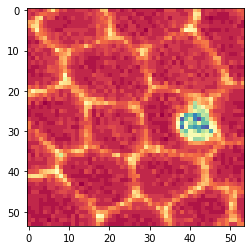

Epoch 38/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.8561 - acc: 0.2473 - val_loss: 0.9112 - val_acc: 0.2417

Epoch 00038: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.9111672514611134, 'val_acc': 0.24170616094911646, 'loss': 0.856063293318934, 'acc': 0.2472835120624496, 'lr': 1e-06}


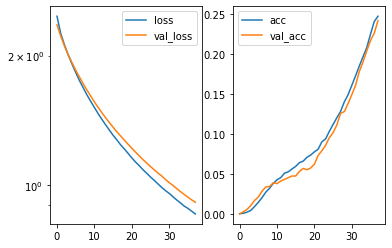

Predicted cell: Normal Probability: [[0.8556496]]
True Cell type: Normal
X [[0.501905]]
True positional value X 0.5
Y [[0.46462935]]
True positional value Y 0.5
H [[0.46044207]]
True positional value H 0.25925925925925924
W [[0.4797989]]
True positional value W 0.35185185185185186
C [[0.5378341]]
True positional value C 1.0


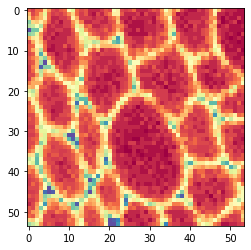

Epoch 39/250
36076/36076 [==============================] - 21s 595us/step - loss: 0.8448 - acc: 0.2652 - val_loss: 0.8999 - val_acc: 0.2601

Epoch 00039: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8998504808665954, 'val_acc': 0.2601369126116746, 'loss': 0.8447913441177958, 'acc': 0.2651901544429125, 'lr': 1e-06}


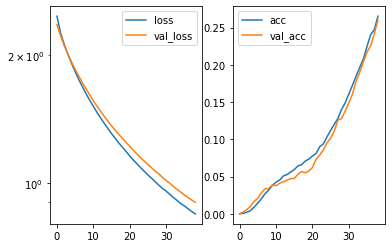

Predicted cell: MatureP1 Probability: [[0.81561637]]
True Cell type: MatureP1
X [[0.5263455]]
True positional value X 0.6851851851851852
Y [[0.46963656]]
True positional value Y 0.3148148148148148
H [[0.49450204]]
True positional value H 0.4444444444444444
W [[0.49309474]]
True positional value W 0.3148148148148148
C [[0.5834907]]
True positional value C 1.0


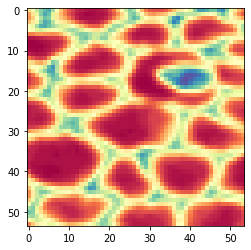

Epoch 40/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.8344 - acc: 0.2762 - val_loss: 0.8884 - val_acc: 0.2707

Epoch 00040: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8883622763281185, 'val_acc': 0.27066877503154024, 'loss': 0.8343725540788914, 'acc': 0.2761947002742253, 'lr': 1e-06}


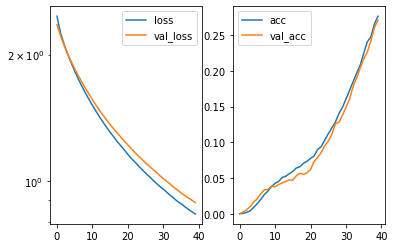

Predicted cell: MacroCheate Probability: [[0.9921582]]
True Cell type: MacroCheate
X [[0.60481787]]
True positional value X 0.5
Y [[0.42652288]]
True positional value Y 0.3148148148148148
H [[0.43171287]]
True positional value H 0.5740740740740741
W [[0.57503253]]
True positional value W 0.8518518518518519
C [[0.6323242]]
True positional value C 1.0


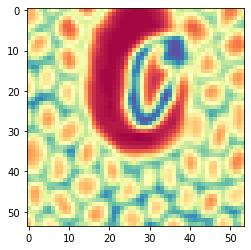

Epoch 41/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.8242 - acc: 0.2939 - val_loss: 0.8765 - val_acc: 0.2875

Epoch 00041: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8764788871253397, 'val_acc': 0.28751974571309885, 'loss': 0.8241925575421515, 'acc': 0.2938795890243979, 'lr': 1e-06}


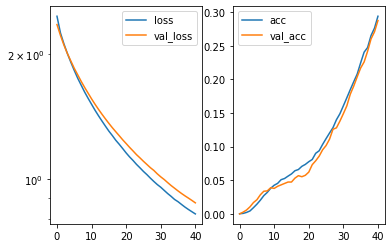

Predicted cell: MatureP1 Probability: [[0.89947104]]
True Cell type: MatureP1
X [[0.39013708]]
True positional value X 0.3148148148148148
Y [[0.54963243]]
True positional value Y 0.5
H [[0.43612346]]
True positional value H 0.4074074074074074
W [[0.3944996]]
True positional value W 0.35185185185185186
C [[0.54051214]]
True positional value C 1.0


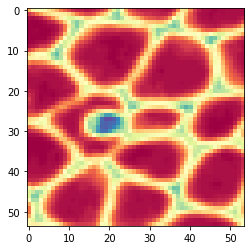

Epoch 42/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.8136 - acc: 0.3031 - val_loss: 0.8664 - val_acc: 0.2970

Epoch 00042: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8664161165555319, 'val_acc': 0.2969984229989526, 'loss': 0.8135777717353578, 'acc': 0.3031101018729, 'lr': 1e-06}


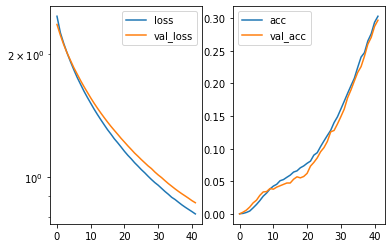

Predicted cell: MatureP1 Probability: [[0.92758155]]
True Cell type: MatureP1
X [[0.38994586]]
True positional value X 0.5
Y [[0.54718804]]
True positional value Y 0.6851851851851852
H [[0.41529292]]
True positional value H 0.18518518518518517
W [[0.41462463]]
True positional value W 0.18518518518518517
C [[0.5418]]
True positional value C 0.0


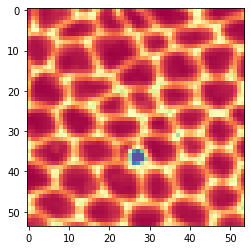

Epoch 43/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.8033 - acc: 0.3183 - val_loss: 0.8571 - val_acc: 0.3117

Epoch 00043: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8571189501337029, 'val_acc': 0.3117430273045233, 'loss': 0.8033478005998533, 'acc': 0.3183279757238516, 'lr': 1e-06}


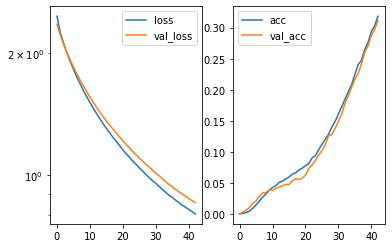

Predicted cell: MacroCheate Probability: [[0.7051117]]
True Cell type: MacroCheate
X [[0.3221535]]
True positional value X 0.3148148148148148
Y [[0.55330837]]
True positional value Y 0.5
H [[0.46318156]]
True positional value H 0.35185185185185186
W [[0.35492358]]
True positional value W 0.4444444444444444
C [[0.5907146]]
True positional value C 1.0


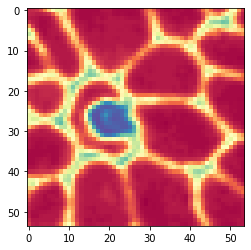

Epoch 44/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.7961 - acc: 0.3294 - val_loss: 0.8477 - val_acc: 0.3165

Epoch 00044: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8477400740929313, 'val_acc': 0.3164823618984775, 'loss': 0.7961421615004949, 'acc': 0.32936024107885725, 'lr': 1e-06}


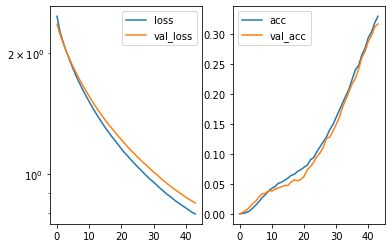

Predicted cell: MatureP1 Probability: [[0.91472876]]
True Cell type: MatureP1
X [[0.43999913]]
True positional value X 0.5
Y [[0.51867265]]
True positional value Y 0.5
H [[0.43282902]]
True positional value H 0.3148148148148148
W [[0.53946185]]
True positional value W 0.2962962962962963
C [[0.6030403]]
True positional value C 1.0


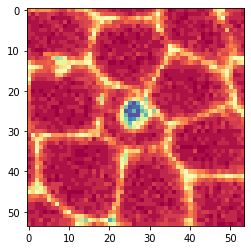

Epoch 45/250
36076/36076 [==============================] - 21s 595us/step - loss: 0.7867 - acc: 0.3410 - val_loss: 0.8390 - val_acc: 0.3412

Epoch 00045: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8389599945684556, 'val_acc': 0.34123222833561107, 'loss': 0.7866668707846749, 'acc': 0.34103004928966996, 'lr': 1e-06}


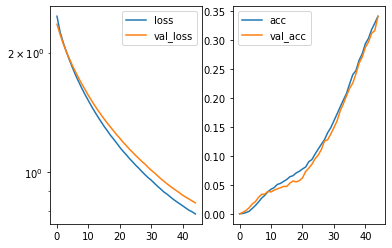

Predicted cell: MatureP1 Probability: [[0.92042255]]
True Cell type: MacroCheate
X [[0.47393253]]
True positional value X 0.5
Y [[0.6123922]]
True positional value Y 0.5
H [[0.49964428]]
True positional value H 0.3148148148148148
W [[0.44092086]]
True positional value W 0.3333333333333333
C [[0.7067376]]
True positional value C 1.0


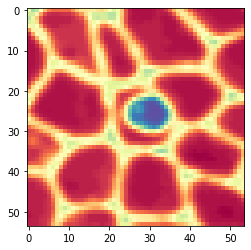

Epoch 46/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.7784 - acc: 0.3561 - val_loss: 0.8306 - val_acc: 0.3570

Epoch 00046: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.830572384260026, 'val_acc': 0.3570300151700406, 'loss': 0.7783796564017157, 'acc': 0.35605388643677105, 'lr': 1e-06}


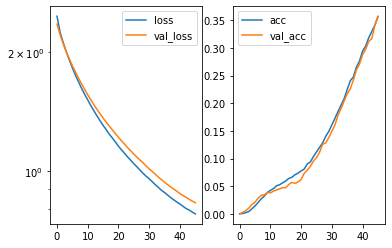

Predicted cell: Normal Probability: [[0.96572036]]
True Cell type: Normal
X [[0.45426846]]
True positional value X 0.5
Y [[0.53162634]]
True positional value Y 0.5
H [[0.36054638]]
True positional value H 0.5370370370370371
W [[0.4674973]]
True positional value W 0.48148148148148145
C [[0.5992228]]
True positional value C 1.0


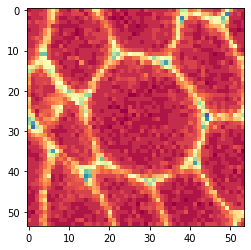

Epoch 47/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.7708 - acc: 0.3668 - val_loss: 0.8215 - val_acc: 0.3691

Epoch 00047: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8214909773616178, 'val_acc': 0.36914165438068985, 'loss': 0.7707804539526417, 'acc': 0.3668366781322215, 'lr': 1e-06}


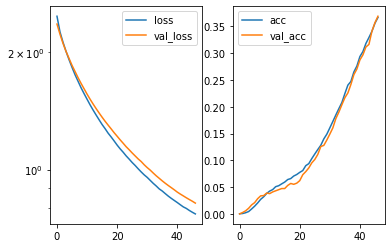

Predicted cell: MatureP1 Probability: [[0.74439013]]
True Cell type: MatureP1
X [[0.5512357]]
True positional value X 0.6851851851851852
Y [[0.4400006]]
True positional value Y 0.3148148148148148
H [[0.3485369]]
True positional value H 0.2222222222222222
W [[0.55224156]]
True positional value W 0.25925925925925924
C [[0.6053185]]
True positional value C 1.0


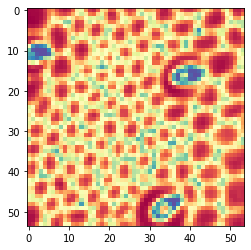

Epoch 48/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.7641 - acc: 0.3771 - val_loss: 0.8149 - val_acc: 0.3712

Epoch 00048: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8148717496067427, 'val_acc': 0.37124802624947023, 'loss': 0.7641298049225064, 'acc': 0.3771205236568381, 'lr': 1e-06}


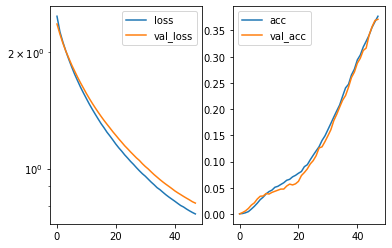

Predicted cell: MacroCheate Probability: [[0.6100733]]
True Cell type: MatureP1
X [[0.4805388]]
True positional value X 0.3148148148148148
Y [[0.59216285]]
True positional value Y 0.5
H [[0.4264017]]
True positional value H 0.46296296296296297
W [[0.5137273]]
True positional value W 0.46296296296296297
C [[0.597676]]
True positional value C 1.0


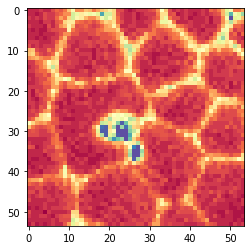

Epoch 49/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.7564 - acc: 0.3854 - val_loss: 0.8074 - val_acc: 0.3886

Epoch 00049: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8074460739584708, 'val_acc': 0.38862559040826894, 'loss': 0.7564413347533991, 'acc': 0.38540858152086105, 'lr': 1e-06}


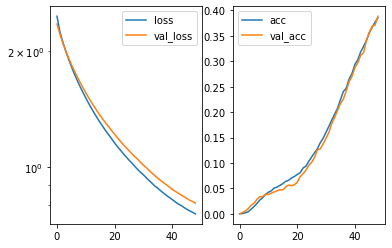

Predicted cell: Normal Probability: [[0.9541439]]
True Cell type: Normal
X [[0.48610568]]
True positional value X 0.5
Y [[0.46897572]]
True positional value Y 0.5
H [[0.50376]]
True positional value H 0.2962962962962963
W [[0.5208507]]
True positional value W 0.2777777777777778
C [[0.60121804]]
True positional value C 1.0


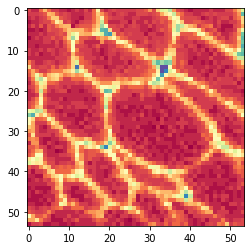

Epoch 50/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.7499 - acc: 0.4015 - val_loss: 0.8018 - val_acc: 0.3939

Epoch 00050: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.8017506958497957, 'val_acc': 0.3938915174436795, 'loss': 0.7499153831010648, 'acc': 0.4015411895934514, 'lr': 1e-06}


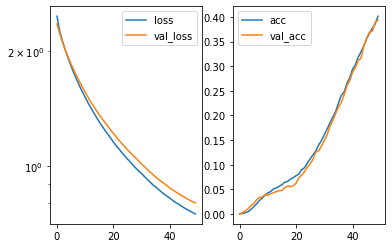

Predicted cell: Normal Probability: [[0.9774851]]
True Cell type: Normal
X [[0.46404833]]
True positional value X 0.5
Y [[0.52984643]]
True positional value Y 0.5
H [[0.480582]]
True positional value H 0.3888888888888889
W [[0.3857708]]
True positional value W 0.42592592592592593
C [[0.6838956]]
True positional value C 1.0


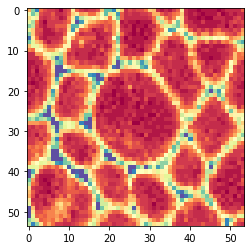

Epoch 51/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.7445 - acc: 0.4067 - val_loss: 0.7944 - val_acc: 0.4044

Epoch 00051: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7944472876268038, 'val_acc': 0.4044233756890229, 'loss': 0.7444662757532627, 'acc': 0.40672469083750534, 'lr': 1e-06}


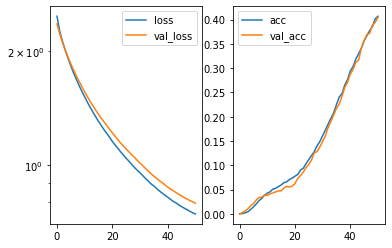

Predicted cell: Normal Probability: [[0.87352645]]
True Cell type: Normal
X [[0.4785999]]
True positional value X 0.5
Y [[0.49053505]]
True positional value Y 0.5
H [[0.40819332]]
True positional value H 0.2777777777777778
W [[0.44420943]]
True positional value W 0.25925925925925924
C [[0.55424243]]
True positional value C 1.0


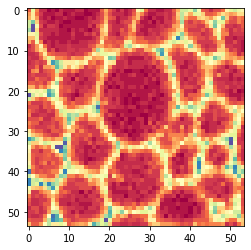

Epoch 52/250
36076/36076 [==============================] - 21s 595us/step - loss: 0.7364 - acc: 0.4215 - val_loss: 0.7876 - val_acc: 0.4155

Epoch 00052: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7875695008864962, 'val_acc': 0.41548183158612867, 'loss': 0.7364176277813487, 'acc': 0.42149905537750043, 'lr': 1e-06}


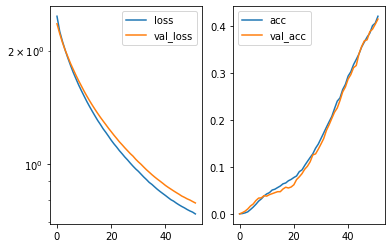

Predicted cell: MacroCheate Probability: [[0.80869675]]
True Cell type: MacroCheate
X [[0.35897937]]
True positional value X 0.3148148148148148
Y [[0.51700705]]
True positional value Y 0.5
H [[0.5154587]]
True positional value H 0.6111111111111112
W [[0.38370818]]
True positional value W 0.6481481481481481
C [[0.597812]]
True positional value C 1.0


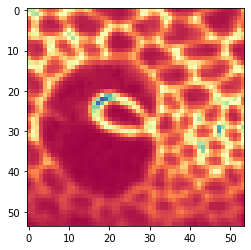

Epoch 53/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.7329 - acc: 0.4277 - val_loss: 0.7818 - val_acc: 0.4265

Epoch 00053: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7817585279026302, 'val_acc': 0.42654028227292845, 'loss': 0.7328633892389448, 'acc': 0.4277081697673673, 'lr': 1e-06}


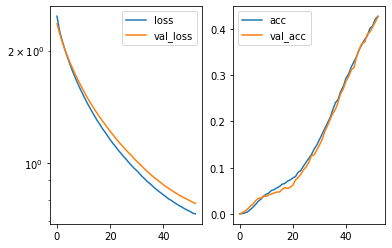

Predicted cell: MacroCheate Probability: [[0.8287272]]
True Cell type: MacroCheate
X [[0.5338341]]
True positional value X 0.6851851851851852
Y [[0.6124797]]
True positional value Y 0.6851851851851852
H [[0.5007002]]
True positional value H 0.6111111111111112
W [[0.40525836]]
True positional value W 0.6481481481481481
C [[0.5499686]]
True positional value C 1.0


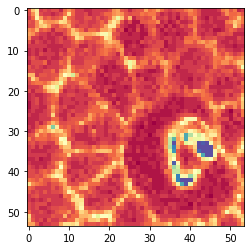

Epoch 54/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.7253 - acc: 0.4378 - val_loss: 0.7756 - val_acc: 0.4397

Epoch 00054: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7756411786327995, 'val_acc': 0.43970510534640045, 'loss': 0.7253148491452124, 'acc': 0.4378256984819183, 'lr': 1e-06}


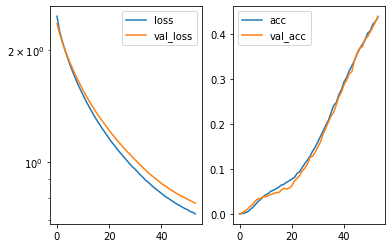

Predicted cell: Normal Probability: [[0.93786085]]
True Cell type: Normal
X [[0.4410308]]
True positional value X 0.5
Y [[0.5276683]]
True positional value Y 0.5
H [[0.47374925]]
True positional value H 0.46296296296296297
W [[0.49368542]]
True positional value W 0.46296296296296297
C [[0.6321852]]
True positional value C 1.0


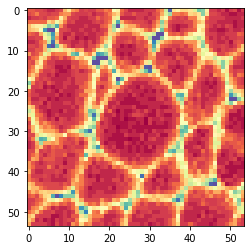

Epoch 55/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.7193 - acc: 0.4510 - val_loss: 0.7711 - val_acc: 0.4418

Epoch 00055: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7710930290757009, 'val_acc': 0.44181147825096456, 'loss': 0.7193153801124552, 'acc': 0.4509646274427813, 'lr': 1e-06}


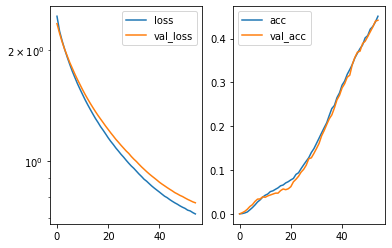

Predicted cell: MacroCheate Probability: [[0.96630245]]
True Cell type: MacroCheate
X [[0.35153455]]
True positional value X 0.5
Y [[0.64206094]]
True positional value Y 0.6851851851851852
H [[0.4952228]]
True positional value H 0.42592592592592593
W [[0.4630793]]
True positional value W 0.5555555555555556
C [[0.48151547]]
True positional value C 1.0


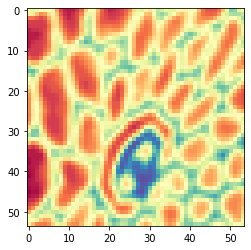

Epoch 56/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.7151 - acc: 0.4585 - val_loss: 0.7657 - val_acc: 0.4529

Epoch 00056: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.765719081490463, 'val_acc': 0.45286993206080917, 'loss': 0.7151317953970893, 'acc': 0.45853198456888467, 'lr': 1e-06}


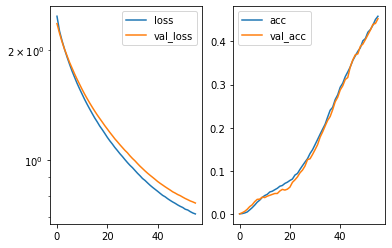

Predicted cell: MatureP1 Probability: [[0.9800544]]
True Cell type: MatureP1
X [[0.47331685]]
True positional value X 0.6851851851851852
Y [[0.6657634]]
True positional value Y 0.6851851851851852
H [[0.42713124]]
True positional value H 0.48148148148148145
W [[0.38287717]]
True positional value W 0.3888888888888889
C [[0.46600768]]
True positional value C 1.0


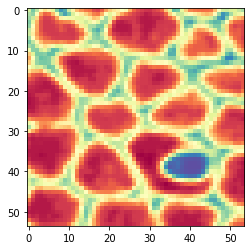

Epoch 57/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.7106 - acc: 0.4632 - val_loss: 0.7601 - val_acc: 0.4602

Epoch 00057: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7600614955828277, 'val_acc': 0.4602422293799372, 'loss': 0.7105581830856157, 'acc': 0.46321654051776895, 'lr': 1e-06}


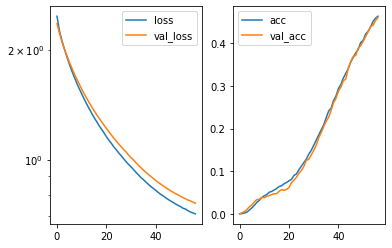

Predicted cell: MacroCheate Probability: [[0.9975038]]
True Cell type: MacroCheate
X [[0.5312418]]
True positional value X 0.6851851851851852
Y [[0.48129407]]
True positional value Y 0.5
H [[0.53011215]]
True positional value H 0.9074074074074074
W [[0.50292474]]
True positional value W 0.9444444444444444
C [[0.57924086]]
True positional value C 1.0


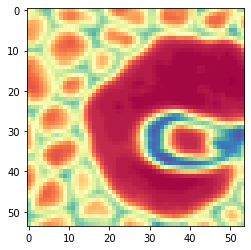

Epoch 58/250
36076/36076 [==============================] - 21s 595us/step - loss: 0.7063 - acc: 0.4706 - val_loss: 0.7554 - val_acc: 0.4687

Epoch 00058: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7554385903447851, 'val_acc': 0.46866771836165316, 'loss': 0.7063030259666586, 'acc': 0.470589863605015, 'lr': 1e-06}


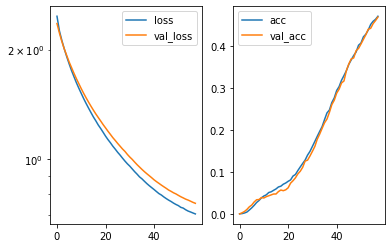

Predicted cell: MatureP1 Probability: [[0.5314453]]
True Cell type: MatureP1
X [[0.47446743]]
True positional value X 0.6851851851851852
Y [[0.46177268]]
True positional value Y 0.3148148148148148
H [[0.4528752]]
True positional value H 0.46296296296296297
W [[0.54279363]]
True positional value W 0.46296296296296297
C [[0.6094372]]
True positional value C 1.0


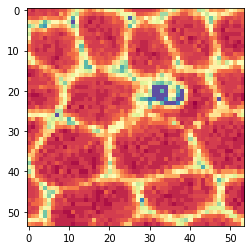

Epoch 59/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.7004 - acc: 0.4817 - val_loss: 0.7503 - val_acc: 0.4808

Epoch 00059: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7503452859406976, 'val_acc': 0.48077935498284313, 'loss': 0.7003995445076253, 'acc': 0.4817330052852895, 'lr': 1e-06}


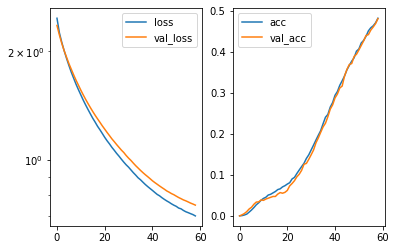

Predicted cell: MatureP1 Probability: [[0.97489434]]
True Cell type: MatureP1
X [[0.54511166]]
True positional value X 0.6851851851851852
Y [[0.36274147]]
True positional value Y 0.5
H [[0.39730462]]
True positional value H 0.5185185185185185
W [[0.41505915]]
True positional value W 0.3888888888888889
C [[0.6813934]]
True positional value C 1.0


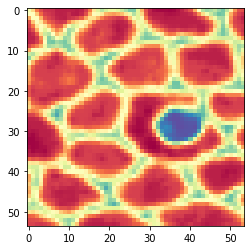

Epoch 60/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.6951 - acc: 0.4910 - val_loss: 0.7457 - val_acc: 0.4855

Epoch 00060: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7456521861423876, 'val_acc': 0.4855186895611036, 'loss': 0.6950906650799845, 'acc': 0.4910189575281385, 'lr': 1e-06}


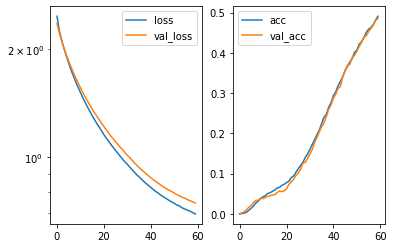

Predicted cell: MatureP1 Probability: [[0.9819932]]
True Cell type: MatureP1
X [[0.47832122]]
True positional value X 0.6851851851851852
Y [[0.5046123]]
True positional value Y 0.6851851851851852
H [[0.40245277]]
True positional value H 0.35185185185185186
W [[0.39226675]]
True positional value W 0.2962962962962963
C [[0.5419707]]
True positional value C 1.0


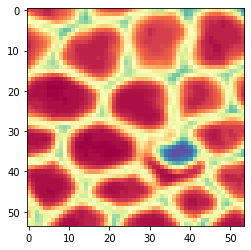

Epoch 61/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.6913 - acc: 0.4957 - val_loss: 0.7417 - val_acc: 0.4897

Epoch 00061: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7417433049692613, 'val_acc': 0.4897314358881237, 'loss': 0.6913231827425235, 'acc': 0.49567579306775256, 'lr': 1e-06}


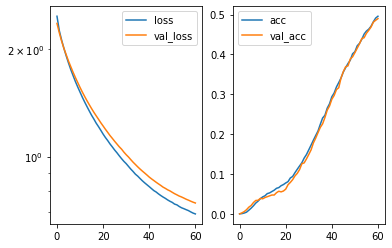

Predicted cell: Normal Probability: [[0.94544303]]
True Cell type: Normal
X [[0.4367406]]
True positional value X 0.5
Y [[0.5087992]]
True positional value Y 0.5
H [[0.5136453]]
True positional value H 0.3333333333333333
W [[0.53520226]]
True positional value W 0.2962962962962963
C [[0.5607667]]
True positional value C 1.0


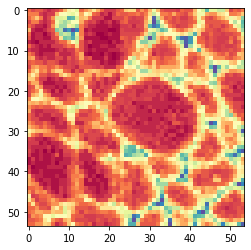

Epoch 62/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.6862 - acc: 0.5020 - val_loss: 0.7374 - val_acc: 0.4966

Epoch 00062: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7373878676179461, 'val_acc': 0.49657714495601124, 'loss': 0.6862489342332639, 'acc': 0.5019957824264348, 'lr': 1e-06}


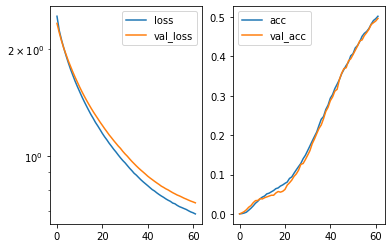

Predicted cell: MacroCheate Probability: [[0.9147357]]
True Cell type: MacroCheate
X [[0.40149796]]
True positional value X 0.5
Y [[0.4884408]]
True positional value Y 0.6851851851851852
H [[0.4070373]]
True positional value H 0.3888888888888889
W [[0.39071375]]
True positional value W 0.46296296296296297
C [[0.53564155]]
True positional value C 1.0


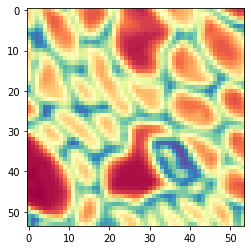

Epoch 63/250
36076/36076 [==============================] - 21s 596us/step - loss: 0.6835 - acc: 0.5120 - val_loss: 0.7334 - val_acc: 0.5050

Epoch 00063: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7334246275737576, 'val_acc': 0.505002629763205, 'loss': 0.6834954666462213, 'acc': 0.5120301549358529, 'lr': 1e-06}


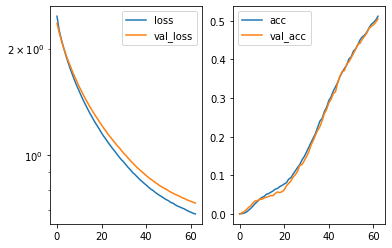

Predicted cell: MacroCheate Probability: [[0.96832776]]
True Cell type: MacroCheate
X [[0.57762486]]
True positional value X 0.6851851851851852
Y [[0.43446037]]
True positional value Y 0.5
H [[0.2977975]]
True positional value H 0.48148148148148145
W [[0.424501]]
True positional value W 0.48148148148148145
C [[0.7098627]]
True positional value C 1.0


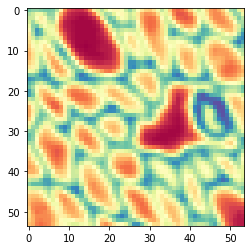

Epoch 64/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.6806 - acc: 0.5173 - val_loss: 0.7292 - val_acc: 0.5118

Epoch 00064: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7291645009998524, 'val_acc': 0.5118483362102458, 'loss': 0.6806228807924434, 'acc': 0.5173245344778984, 'lr': 1e-06}


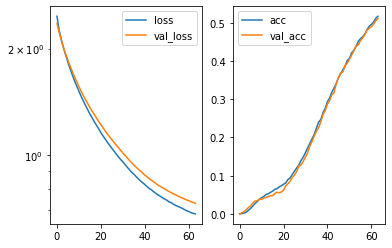

Predicted cell: MatureP1 Probability: [[0.9891888]]
True Cell type: MatureP1
X [[0.6331786]]
True positional value X 0.6851851851851852
Y [[0.38411403]]
True positional value Y 0.3148148148148148
H [[0.49237174]]
True positional value H 0.35185185185185186
W [[0.50838375]]
True positional value W 0.3333333333333333
C [[0.7017344]]
True positional value C 1.0


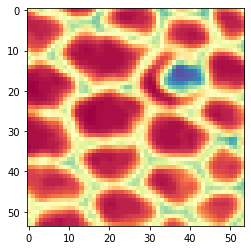

Epoch 65/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6762 - acc: 0.5225 - val_loss: 0.7253 - val_acc: 0.5176

Epoch 00065: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7253169057681851, 'val_acc': 0.5176408598459413, 'loss': 0.6761580745625858, 'acc': 0.5224803149409378, 'lr': 1e-06}


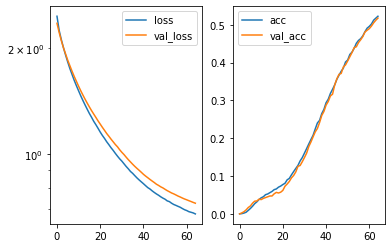

Predicted cell: MacroCheate Probability: [[0.81115663]]
True Cell type: MacroCheate
X [[0.5683561]]
True positional value X 0.6851851851851852
Y [[0.67292523]]
True positional value Y 0.6851851851851852
H [[0.49413133]]
True positional value H 0.8518518518518519
W [[0.4554664]]
True positional value W 0.9074074074074074
C [[0.5238662]]
True positional value C 1.0


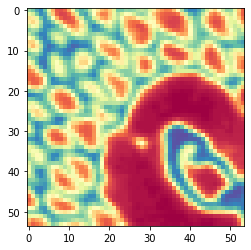

Epoch 66/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.6723 - acc: 0.5296 - val_loss: 0.7216 - val_acc: 0.5319

Epoch 00066: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7215813076012758, 'val_acc': 0.5318588651814795, 'loss': 0.6722634425645975, 'acc': 0.5295764456561642, 'lr': 1e-06}


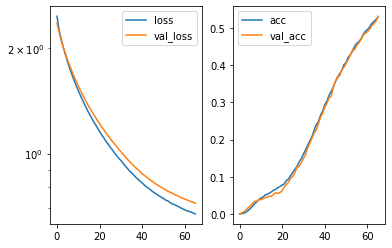

Predicted cell: NonMatureP1 Probability: [[0.96235454]]
True Cell type: NonMatureP1
X [[0.45975414]]
True positional value X 0.3148148148148148
Y [[0.51537144]]
True positional value Y 0.6851851851851852
H [[0.4806431]]
True positional value H 0.3148148148148148
W [[0.4923892]]
True positional value W 0.3888888888888889
C [[0.6761809]]
True positional value C 1.0


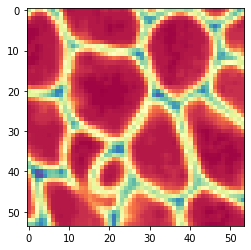

Epoch 67/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.6677 - acc: 0.5383 - val_loss: 0.7176 - val_acc: 0.5361

Epoch 00067: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7176102349606234, 'val_acc': 0.5360716104570221, 'loss': 0.6676556179999036, 'acc': 0.5382802927423996, 'lr': 1e-06}


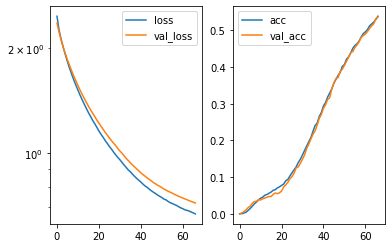

Predicted cell: NonMatureP1 Probability: [[0.9310015]]
True Cell type: NonMatureP1
X [[0.45917663]]
True positional value X 0.5
Y [[0.4919715]]
True positional value Y 0.3148148148148148
H [[0.54916537]]
True positional value H 0.4444444444444444
W [[0.47729188]]
True positional value W 0.3888888888888889
C [[0.5387057]]
True positional value C 1.0


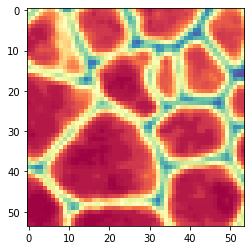

Epoch 68/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.6651 - acc: 0.5409 - val_loss: 0.7146 - val_acc: 0.5450

Epoch 00068: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7145999665948326, 'val_acc': 0.5450236866698885, 'loss': 0.6651128531295374, 'acc': 0.5409413422405727, 'lr': 1e-06}


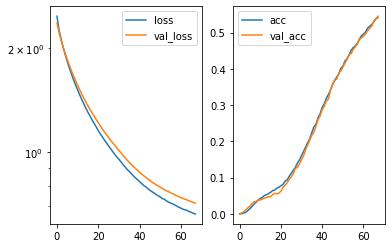

Predicted cell: MacroCheate Probability: [[0.9998122]]
True Cell type: MacroCheate
X [[0.5602625]]
True positional value X 0.5
Y [[0.37771082]]
True positional value Y 0.5
H [[0.5316327]]
True positional value H 0.3148148148148148
W [[0.4059616]]
True positional value W 0.4074074074074074
C [[0.7436381]]
True positional value C 1.0


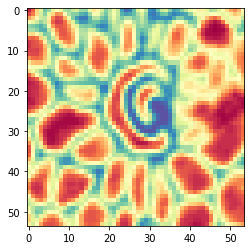

Epoch 69/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.6614 - acc: 0.5461 - val_loss: 0.7107 - val_acc: 0.5466

Epoch 00069: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7106785127023071, 'val_acc': 0.5466034655636269, 'loss': 0.6614356143721218, 'acc': 0.546097124778771, 'lr': 1e-06}


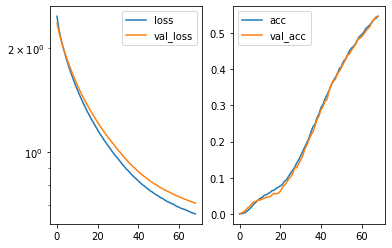

Predicted cell: MatureP1 Probability: [[0.9759603]]
True Cell type: MatureP1
X [[0.37863162]]
True positional value X 0.5
Y [[0.65842026]]
True positional value Y 0.6851851851851852
H [[0.40089726]]
True positional value H 0.4074074074074074
W [[0.36306214]]
True positional value W 0.3148148148148148
C [[0.63697255]]
True positional value C 1.0


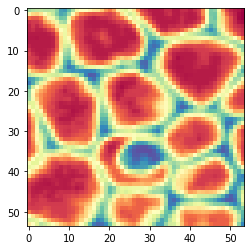

Epoch 70/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.6584 - acc: 0.5568 - val_loss: 0.7073 - val_acc: 0.5561

Epoch 00070: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7072938760058889, 'val_acc': 0.5560821499116424, 'loss': 0.658398481539631, 'acc': 0.5567690411022701, 'lr': 1e-06}


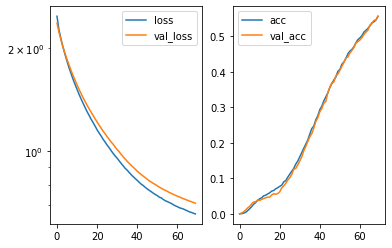

Predicted cell: MacroCheate Probability: [[0.9704399]]
True Cell type: MacroCheate
X [[0.3245089]]
True positional value X 0.3148148148148148
Y [[0.663301]]
True positional value Y 0.6851851851851852
H [[0.41381526]]
True positional value H 0.2962962962962963
W [[0.5465009]]
True positional value W 0.35185185185185186
C [[0.5845091]]
True positional value C 1.0


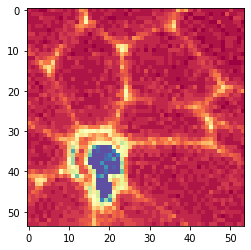

Epoch 71/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6551 - acc: 0.5548 - val_loss: 0.7046 - val_acc: 0.5556

Epoch 00071: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7046063261135055, 'val_acc': 0.5555555537978619, 'loss': 0.655142498116811, 'acc': 0.5548286922247107, 'lr': 1e-06}


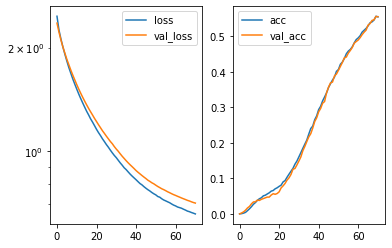

Predicted cell: Normal Probability: [[0.9256587]]
True Cell type: Normal
X [[0.47291648]]
True positional value X 0.5
Y [[0.54842365]]
True positional value Y 0.5
H [[0.46284834]]
True positional value H 0.25925925925925924
W [[0.4428729]]
True positional value W 0.25925925925925924
C [[0.5952374]]
True positional value C 1.0


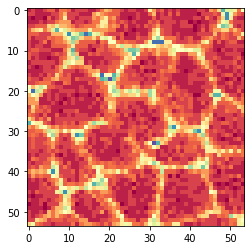

Epoch 72/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6519 - acc: 0.5667 - val_loss: 0.7013 - val_acc: 0.5619

Epoch 00072: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.7013367815919146, 'val_acc': 0.5618746688392302, 'loss': 0.651886979932729, 'acc': 0.5667202551133063, 'lr': 1e-06}


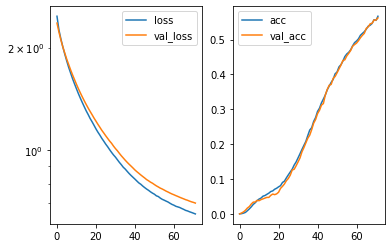

Predicted cell: MacroCheate Probability: [[0.9975164]]
True Cell type: MacroCheate
X [[0.5305235]]
True positional value X 0.5
Y [[0.32622582]]
True positional value Y 0.3148148148148148
H [[0.37814963]]
True positional value H 0.3148148148148148
W [[0.6441171]]
True positional value W 0.37037037037037035
C [[0.6434517]]
True positional value C 1.0


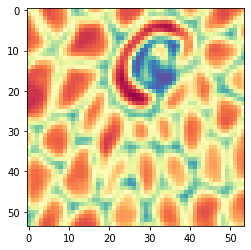

Epoch 73/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6480 - acc: 0.5659 - val_loss: 0.6976 - val_acc: 0.5671

Epoch 00073: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6975671730272515, 'val_acc': 0.5671406026700097, 'loss': 0.6479761705904529, 'acc': 0.5659163952111695, 'lr': 1e-06}


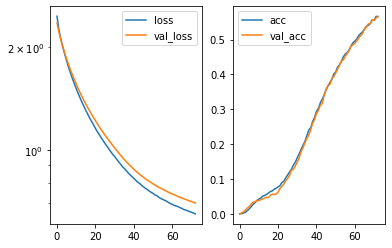

Predicted cell: MacroCheate Probability: [[0.97291404]]
True Cell type: MacroCheate
X [[0.6341885]]
True positional value X 0.6851851851851852
Y [[0.4873386]]
True positional value Y 0.3148148148148148
H [[0.39618915]]
True positional value H 0.8333333333333334
W [[0.59138745]]
True positional value W 0.7962962962962963
C [[0.73981804]]
True positional value C 1.0


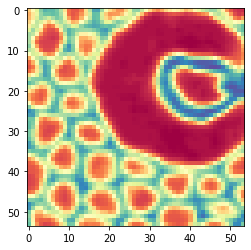

Epoch 74/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6448 - acc: 0.5746 - val_loss: 0.6960 - val_acc: 0.5677

Epoch 00074: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6960218572629132, 'val_acc': 0.5676671904033582, 'loss': 0.6447960694384213, 'acc': 0.5745925233585896, 'lr': 1e-06}


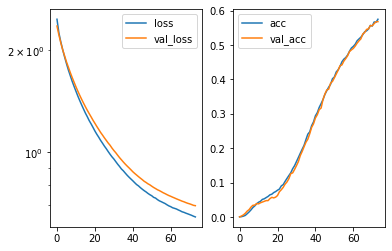

Predicted cell: Normal Probability: [[0.7927248]]
True Cell type: Normal
X [[0.48837203]]
True positional value X 0.5
Y [[0.4850796]]
True positional value Y 0.5
H [[0.42035836]]
True positional value H 0.3888888888888889
W [[0.49811321]]
True positional value W 0.4074074074074074
C [[0.5812278]]
True positional value C 1.0


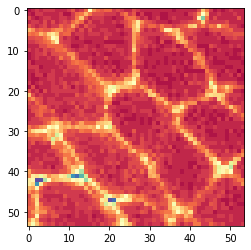

Epoch 75/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.6422 - acc: 0.5783 - val_loss: 0.6935 - val_acc: 0.5735

Epoch 00075: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.693513351562715, 'val_acc': 0.5734597161420086, 'loss': 0.6421554743589352, 'acc': 0.5782514680501217, 'lr': 1e-06}


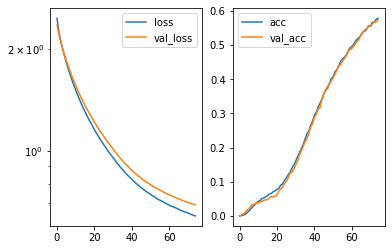

Predicted cell: MacroCheate Probability: [[0.9995012]]
True Cell type: MacroCheate
X [[0.35768908]]
True positional value X 0.5
Y [[0.4422486]]
True positional value Y 0.5
H [[0.41533732]]
True positional value H 0.7037037037037037
W [[0.49281344]]
True positional value W 0.7962962962962963
C [[0.75433326]]
True positional value C 1.0


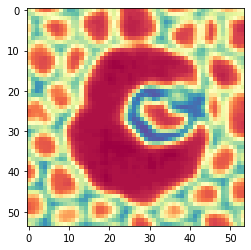

Epoch 76/250
36076/36076 [==============================] - 22s 598us/step - loss: 0.6391 - acc: 0.5813 - val_loss: 0.6897 - val_acc: 0.5756

Epoch 00076: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6896574589187939, 'val_acc': 0.5755660921853112, 'loss': 0.6391474954938396, 'acc': 0.5812728652762182, 'lr': 1e-06}


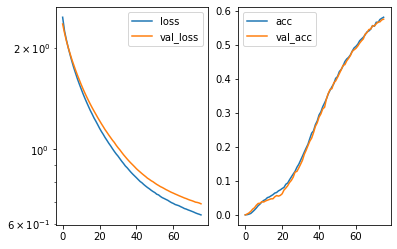

Predicted cell: MacroCheate Probability: [[0.9853284]]
True Cell type: MacroCheate
X [[0.33734414]]
True positional value X 0.3148148148148148
Y [[0.6822331]]
True positional value Y 0.6851851851851852
H [[0.28087643]]
True positional value H 0.4444444444444444
W [[0.3812034]]
True positional value W 0.5185185185185185
C [[0.66156375]]
True positional value C 1.0


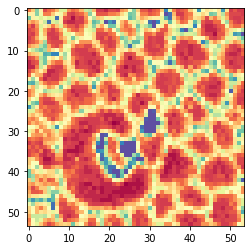

Epoch 77/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.6375 - acc: 0.5850 - val_loss: 0.6865 - val_acc: 0.5814

Epoch 00077: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6865432368196143, 'val_acc': 0.581358609574917, 'loss': 0.6375279229897223, 'acc': 0.585014965766443, 'lr': 1e-06}


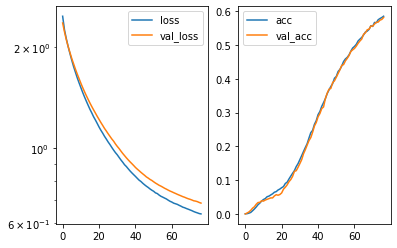

Predicted cell: Normal Probability: [[0.97186804]]
True Cell type: Normal
X [[0.42774948]]
True positional value X 0.5
Y [[0.5120169]]
True positional value Y 0.5
H [[0.45459723]]
True positional value H 0.3888888888888889
W [[0.5047441]]
True positional value W 0.3148148148148148
C [[0.61280054]]
True positional value C 1.0


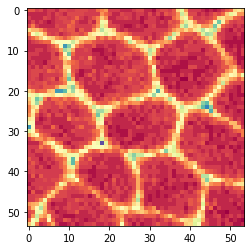

Epoch 78/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6336 - acc: 0.5953 - val_loss: 0.6844 - val_acc: 0.5850

Epoch 00078: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.684430226612995, 'val_acc': 0.5850447598038503, 'loss': 0.6335815803440807, 'acc': 0.5952710940721809, 'lr': 1e-06}


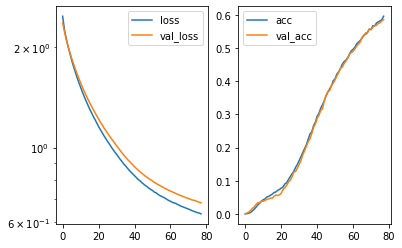

Predicted cell: MatureP1 Probability: [[0.98156285]]
True Cell type: MatureP1
X [[0.34331578]]
True positional value X 0.3148148148148148
Y [[0.5746174]]
True positional value Y 0.6851851851851852
H [[0.35286236]]
True positional value H 0.24074074074074073
W [[0.48515213]]
True positional value W 0.3148148148148148
C [[0.66063696]]
True positional value C 1.0


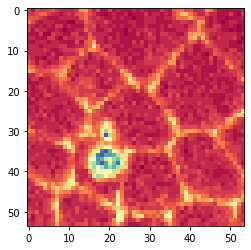

Epoch 79/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6309 - acc: 0.5985 - val_loss: 0.6827 - val_acc: 0.5929

Epoch 00079: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6827047393785268, 'val_acc': 0.5929436589806503, 'loss': 0.6308629651505292, 'acc': 0.5984588080273855, 'lr': 1e-06}


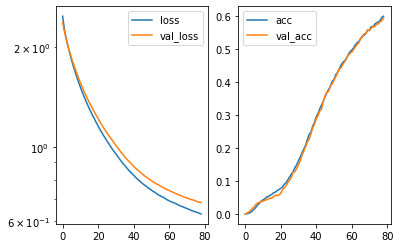

Predicted cell: MatureP1 Probability: [[0.92437214]]
True Cell type: MatureP1
X [[0.47807828]]
True positional value X 0.6851851851851852
Y [[0.4507435]]
True positional value Y 0.6851851851851852
H [[0.33249336]]
True positional value H 0.18518518518518517
W [[0.3379447]]
True positional value W 0.18518518518518517
C [[0.57521975]]
True positional value C 0.0


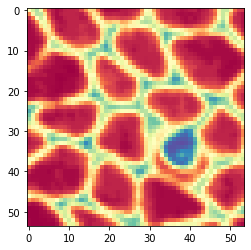

Epoch 80/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6282 - acc: 0.5990 - val_loss: 0.6790 - val_acc: 0.5961

Epoch 00080: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.679020103622324, 'val_acc': 0.5961032104906501, 'loss': 0.6281657477534919, 'acc': 0.5990131914364497, 'lr': 1e-06}


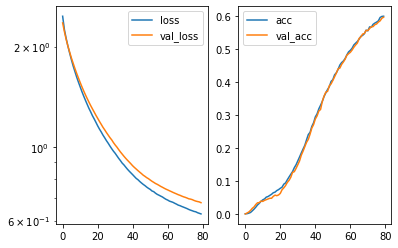

Predicted cell: NonMatureP1 Probability: [[0.9465436]]
True Cell type: NonMatureP1
X [[0.47470456]]
True positional value X 0.3148148148148148
Y [[0.5831955]]
True positional value Y 0.6851851851851852
H [[0.40682828]]
True positional value H 0.46296296296296297
W [[0.45706064]]
True positional value W 0.3148148148148148
C [[0.527522]]
True positional value C 1.0


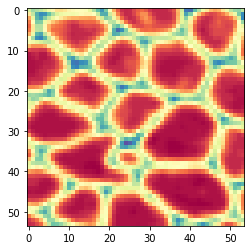

Epoch 81/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.6256 - acc: 0.6050 - val_loss: 0.6762 - val_acc: 0.6008

Epoch 00081: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6761974113247405, 'val_acc': 0.600842544535325, 'loss': 0.6256321327743674, 'acc': 0.6050005525512486, 'lr': 1e-06}


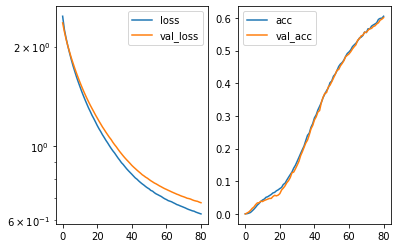

Predicted cell: Normal Probability: [[0.8918625]]
True Cell type: Normal
X [[0.33512112]]
True positional value X 0.5
Y [[0.4732626]]
True positional value Y 0.5
H [[0.28037164]]
True positional value H 0.18518518518518517
W [[0.44250017]]
True positional value W 0.48148148148148145
C [[0.6220875]]
True positional value C 1.0


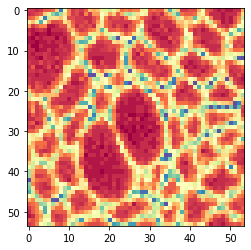

Epoch 82/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.6236 - acc: 0.6096 - val_loss: 0.6759 - val_acc: 0.6024

Epoch 00082: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6758966421440691, 'val_acc': 0.6024223271013875, 'loss': 0.6236236120211416, 'acc': 0.6095742318361638, 'lr': 1e-06}


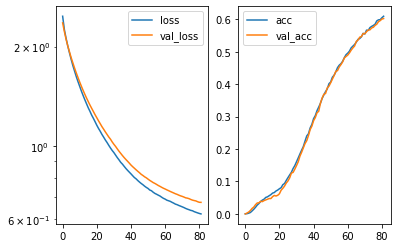

Predicted cell: NonMatureP1 Probability: [[0.8896496]]
True Cell type: NonMatureP1
X [[0.60692346]]
True positional value X 0.5
Y [[0.42182606]]
True positional value Y 0.3148148148148148
H [[0.42906237]]
True positional value H 0.2962962962962963
W [[0.49518913]]
True positional value W 0.3333333333333333
C [[0.7066508]]
True positional value C 1.0


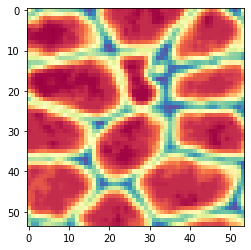

Epoch 83/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.6207 - acc: 0.6122 - val_loss: 0.6727 - val_acc: 0.6087

Epoch 00083: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6727407808175773, 'val_acc': 0.6087414363988642, 'loss': 0.6207382373197048, 'acc': 0.6122075613315069, 'lr': 1e-06}


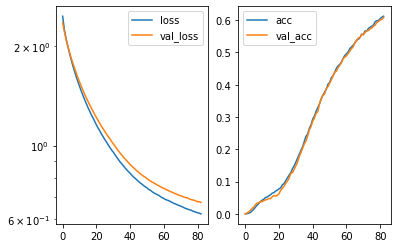

Predicted cell: Normal Probability: [[0.91666436]]
True Cell type: MatureP1
X [[0.4998133]]
True positional value X 0.3148148148148148
Y [[0.50369203]]
True positional value Y 0.6851851851851852
H [[0.50965595]]
True positional value H 0.46296296296296297
W [[0.49508452]]
True positional value W 0.3888888888888889
C [[0.48062214]]
True positional value C 1.0


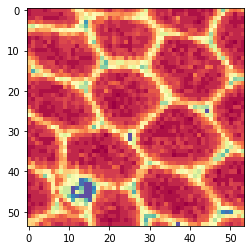

Epoch 84/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.6190 - acc: 0.6173 - val_loss: 0.6699 - val_acc: 0.6082

Epoch 00084: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6698776052273092, 'val_acc': 0.6082148449931916, 'loss': 0.6190230726389467, 'acc': 0.6173079054765894, 'lr': 1e-06}


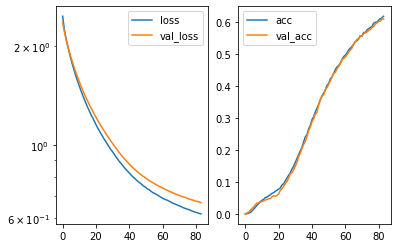

Predicted cell: MacroCheate Probability: [[0.9096443]]
True Cell type: MacroCheate
X [[0.25049862]]
True positional value X 0.3148148148148148
Y [[0.3942452]]
True positional value Y 0.6851851851851852
H [[0.26851946]]
True positional value H 0.5
W [[0.39418578]]
True positional value W 0.48148148148148145
C [[0.5455861]]
True positional value C 1.0


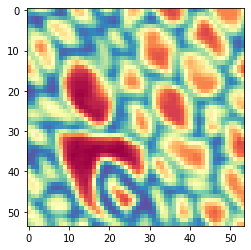

Epoch 85/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6156 - acc: 0.6205 - val_loss: 0.6684 - val_acc: 0.6098

Epoch 00085: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6683732772137129, 'val_acc': 0.609794621281777, 'loss': 0.6156408004359457, 'acc': 0.6204956208592918, 'lr': 1e-06}


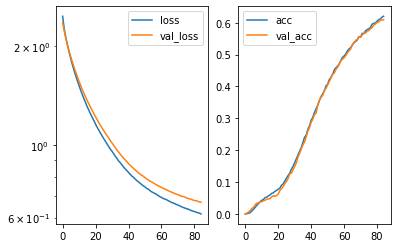

Predicted cell: MacroCheate Probability: [[0.9977869]]
True Cell type: MacroCheate
X [[0.53101784]]
True positional value X 0.5
Y [[0.33495188]]
True positional value Y 0.3148148148148148
H [[0.3166769]]
True positional value H 0.5925925925925926
W [[0.65899026]]
True positional value W 0.5740740740740741
C [[0.7008019]]
True positional value C 1.0


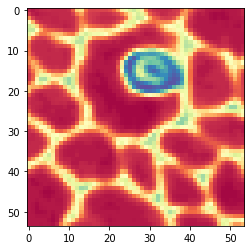

Epoch 86/250
36076/36076 [==============================] - 22s 597us/step - loss: 0.6138 - acc: 0.6244 - val_loss: 0.6666 - val_acc: 0.6156

Epoch 00086: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6666424822782202, 'val_acc': 0.6155871496255804, 'loss': 0.6137658479089734, 'acc': 0.6244040365222553, 'lr': 1e-06}


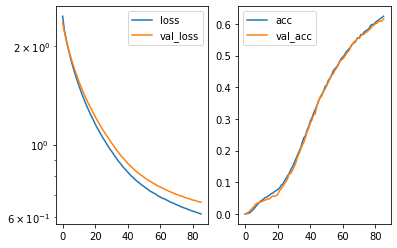

Predicted cell: Normal Probability: [[0.97660756]]
True Cell type: Normal
X [[0.48590386]]
True positional value X 0.5
Y [[0.48098034]]
True positional value Y 0.5
H [[0.5075063]]
True positional value H 0.2962962962962963
W [[0.5106381]]
True positional value W 0.2777777777777778
C [[0.5917245]]
True positional value C 1.0


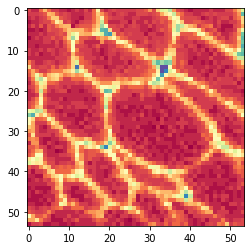

Epoch 87/250
36076/36076 [==============================] - 21s 593us/step - loss: 0.6114 - acc: 0.6262 - val_loss: 0.6632 - val_acc: 0.6203

Epoch 00087: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6631587771066181, 'val_acc': 0.6203264837016427, 'loss': 0.6113716797971953, 'acc': 0.6261780670515541, 'lr': 1e-06}


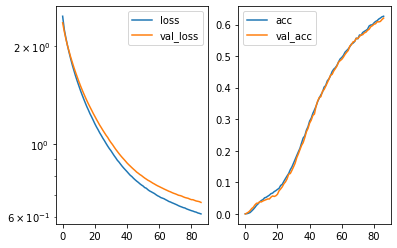

Predicted cell: MatureP1 Probability: [[0.85717607]]
True Cell type: MatureP1
X [[0.36353812]]
True positional value X 0.3148148148148148
Y [[0.7014819]]
True positional value Y 0.6851851851851852
H [[0.38378364]]
True positional value H 0.35185185185185186
W [[0.5293087]]
True positional value W 0.3148148148148148
C [[0.60435665]]
True positional value C 1.0


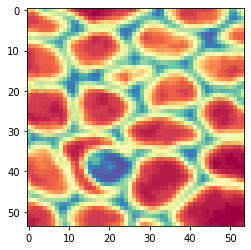

Epoch 88/250
36076/36076 [==============================] - 22s 596us/step - loss: 0.6100 - acc: 0.6316 - val_loss: 0.6614 - val_acc: 0.6245

Epoch 00088: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6613977486488378, 'val_acc': 0.6245392284435998, 'loss': 0.6100202007771649, 'acc': 0.6315833225669506, 'lr': 1e-06}


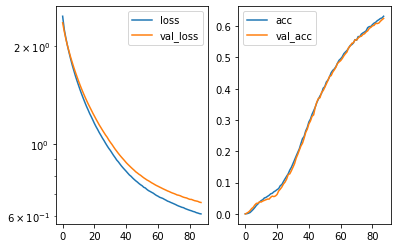

Predicted cell: MatureP1 Probability: [[0.78889984]]
True Cell type: MatureP1
X [[0.51178926]]
True positional value X 0.5
Y [[0.66072845]]
True positional value Y 0.6851851851851852
H [[0.5624721]]
True positional value H 0.3888888888888889
W [[0.41831592]]
True positional value W 0.37037037037037035
C [[0.5169984]]
True positional value C 1.0


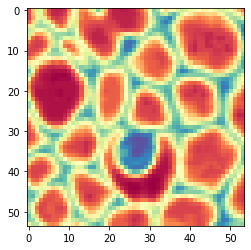

Epoch 89/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6054 - acc: 0.6342 - val_loss: 0.6593 - val_acc: 0.6209

Epoch 00089: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6592896403985127, 'val_acc': 0.6208530792818375, 'loss': 0.6053687558627232, 'acc': 0.634161215334592, 'lr': 1e-06}


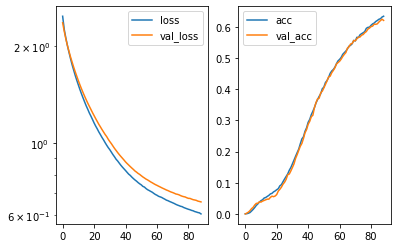

Predicted cell: MatureP1 Probability: [[0.99526113]]
True Cell type: MatureP1
X [[0.3505826]]
True positional value X 0.3148148148148148
Y [[0.39960778]]
True positional value Y 0.3148148148148148
H [[0.4840727]]
True positional value H 0.24074074074074073
W [[0.49121428]]
True positional value W 0.3148148148148148
C [[0.4617807]]
True positional value C 1.0


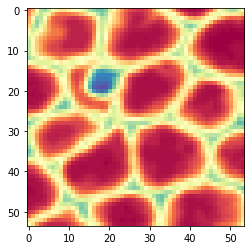

Epoch 90/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.6041 - acc: 0.6398 - val_loss: 0.6572 - val_acc: 0.6282

Epoch 00090: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6572354497753864, 'val_acc': 0.6282253787039204, 'loss': 0.6041463885395605, 'acc': 0.6398436641571513, 'lr': 1e-06}


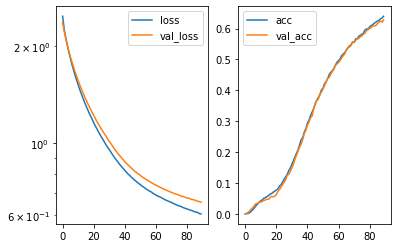

Predicted cell: Normal Probability: [[0.9827655]]
True Cell type: Normal
X [[0.45993987]]
True positional value X 0.5
Y [[0.5090965]]
True positional value Y 0.5
H [[0.42341688]]
True positional value H 0.2037037037037037
W [[0.44593227]]
True positional value W 0.3148148148148148
C [[0.5649021]]
True positional value C 1.0


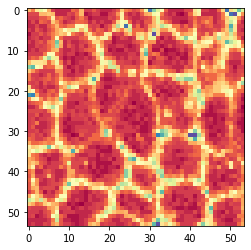

Epoch 91/250
36076/36076 [==============================] - 22s 601us/step - loss: 0.6040 - acc: 0.6402 - val_loss: 0.6555 - val_acc: 0.6256

Epoch 00091: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6555384157079343, 'val_acc': 0.625592410187774, 'loss': 0.6039719481745242, 'acc': 0.6401762935013977, 'lr': 1e-06}


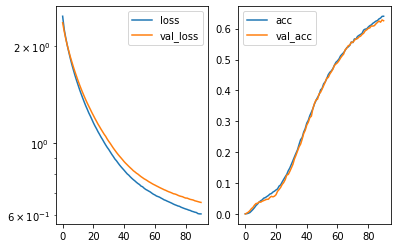

Predicted cell: MatureP1 Probability: [[0.43392825]]
True Cell type: NonMatureP1
X [[0.43921328]]
True positional value X 0.6851851851851852
Y [[0.54244345]]
True positional value Y 0.6851851851851852
H [[0.41456258]]
True positional value H 0.3333333333333333
W [[0.48061213]]
True positional value W 0.2777777777777778
C [[0.5475085]]
True positional value C 1.0


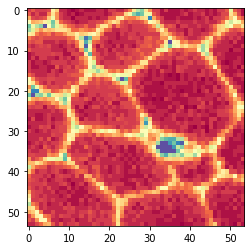

Epoch 92/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.6002 - acc: 0.6453 - val_loss: 0.6530 - val_acc: 0.6330

Epoch 00092: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6529603458631033, 'val_acc': 0.6329647263393332, 'loss': 0.6001821477207776, 'acc': 0.6452766398009446, 'lr': 1e-06}


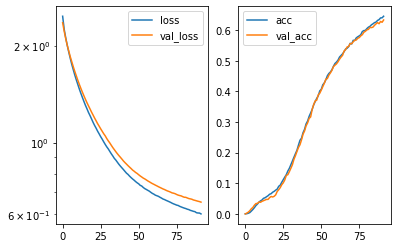

Predicted cell: MatureP1 Probability: [[0.9975078]]
True Cell type: MatureP1
X [[0.3915284]]
True positional value X 0.3148148148148148
Y [[0.60267854]]
True positional value Y 0.6851851851851852
H [[0.39072764]]
True positional value H 0.3888888888888889
W [[0.5199646]]
True positional value W 0.35185185185185186
C [[0.6307883]]
True positional value C 1.0


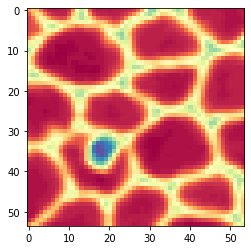

Epoch 93/250
36076/36076 [==============================] - 22s 600us/step - loss: 0.5985 - acc: 0.6472 - val_loss: 0.6515 - val_acc: 0.6367

Epoch 00093: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6514521213253276, 'val_acc': 0.6366508723937442, 'loss': 0.5985284745230591, 'acc': 0.6472169859854235, 'lr': 1e-06}


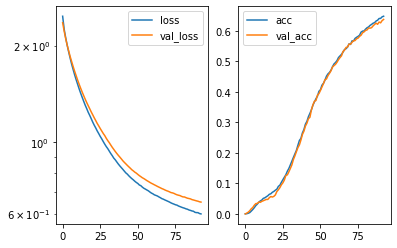

Predicted cell: NonMatureP1 Probability: [[0.98151463]]
True Cell type: NonMatureP1
X [[0.5579202]]
True positional value X 0.5
Y [[0.49386233]]
True positional value Y 0.3148148148148148
H [[0.4875642]]
True positional value H 0.3148148148148148
W [[0.46759441]]
True positional value W 0.3148148148148148
C [[0.65982914]]
True positional value C 1.0


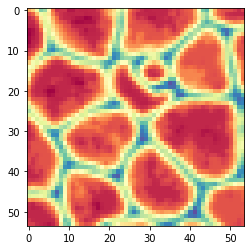

Epoch 94/250
36076/36076 [==============================] - 22s 599us/step - loss: 0.5963 - acc: 0.6502 - val_loss: 0.6505 - val_acc: 0.6461

Epoch 00094: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6505286606629941, 'val_acc': 0.6461295457561748, 'loss': 0.596335454927684, 'acc': 0.6502106657960302, 'lr': 1e-06}


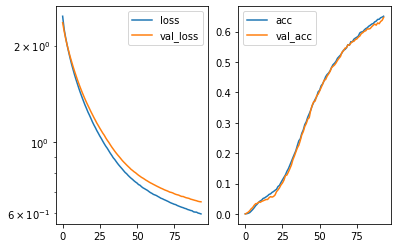

Predicted cell: MatureP1 Probability: [[0.9260405]]
True Cell type: MatureP1
X [[0.36967936]]
True positional value X 0.5
Y [[0.3267582]]
True positional value Y 0.3148148148148148
H [[0.3775578]]
True positional value H 0.37037037037037035
W [[0.6031237]]
True positional value W 0.3148148148148148
C [[0.57700765]]
True positional value C 1.0


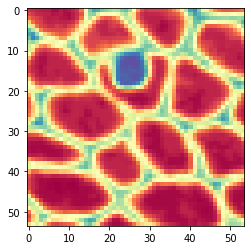

Epoch 95/250
36076/36076 [==============================] - 22s 603us/step - loss: 0.5938 - acc: 0.6536 - val_loss: 0.6482 - val_acc: 0.6482

Epoch 00095: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6482075969754802, 'val_acc': 0.6482359155220003, 'loss': 0.5937582756479295, 'acc': 0.6536201375764521, 'lr': 1e-06}


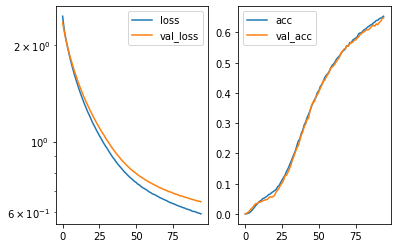

Predicted cell: MatureP1 Probability: [[0.9929923]]
True Cell type: MatureP1
X [[0.33893752]]
True positional value X 0.3148148148148148
Y [[0.4330123]]
True positional value Y 0.3148148148148148
H [[0.43542057]]
True positional value H 0.2962962962962963
W [[0.4856127]]
True positional value W 0.3333333333333333
C [[0.5027526]]
True positional value C 1.0


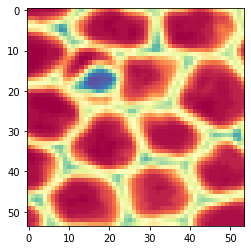

Epoch 96/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.5928 - acc: 0.6584 - val_loss: 0.6454 - val_acc: 0.6509

Epoch 00096: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6453943402595178, 'val_acc': 0.6508688735547601, 'loss': 0.592758441007062, 'acc': 0.6583878491786357, 'lr': 1e-06}


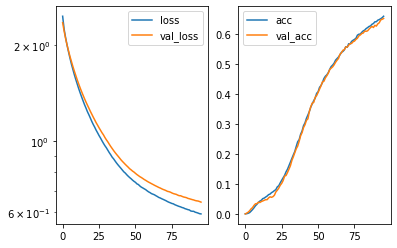

Predicted cell: Normal Probability: [[0.98025984]]
True Cell type: Normal
X [[0.4393438]]
True positional value X 0.5
Y [[0.5018229]]
True positional value Y 0.5
H [[0.48933098]]
True positional value H 0.2222222222222222
W [[0.5227172]]
True positional value W 0.3333333333333333
C [[0.5695852]]
True positional value C 1.0


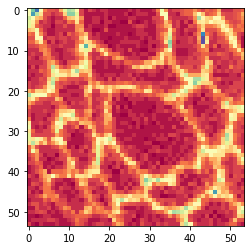

Epoch 97/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.5913 - acc: 0.6613 - val_loss: 0.6442 - val_acc: 0.6561

Epoch 00097: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6442369271605313, 'val_acc': 0.6561348073541522, 'loss': 0.591312786998552, 'acc': 0.6612706522096193, 'lr': 1e-06}


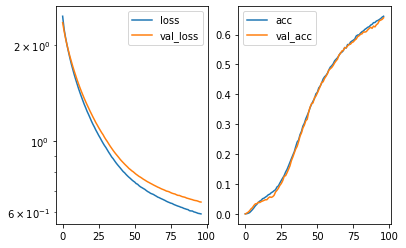

Predicted cell: Normal Probability: [[0.6841378]]
True Cell type: Normal
X [[0.53784305]]
True positional value X 0.5
Y [[0.5157037]]
True positional value Y 0.5
H [[0.51243114]]
True positional value H 0.4074074074074074
W [[0.51826274]]
True positional value W 0.3333333333333333
C [[0.6064495]]
True positional value C 1.0


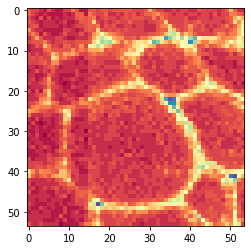

Epoch 98/250
36076/36076 [==============================] - 22s 604us/step - loss: 0.5892 - acc: 0.6576 - val_loss: 0.6422 - val_acc: 0.6546

Epoch 00098: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6421959684546713, 'val_acc': 0.6545550279582155, 'loss': 0.5892370596853536, 'acc': 0.657639428545279, 'lr': 1e-06}


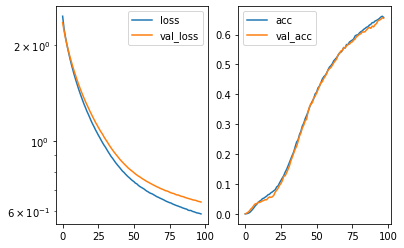

Predicted cell: MacroCheate Probability: [[0.98450017]]
True Cell type: MacroCheate
X [[0.49149835]]
True positional value X 0.6851851851851852
Y [[0.5277231]]
True positional value Y 0.6851851851851852
H [[0.35398978]]
True positional value H 0.48148148148148145
W [[0.47662303]]
True positional value W 0.6296296296296297
C [[0.46953118]]
True positional value C 1.0


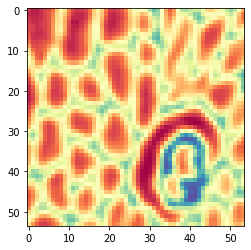

Epoch 99/250
36076/36076 [==============================] - 22s 604us/step - loss: 0.5879 - acc: 0.6650 - val_loss: 0.6413 - val_acc: 0.6524

Epoch 00099: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.6412597699439042, 'val_acc': 0.6524486581923901, 'loss': 0.5878593091729978, 'acc': 0.6649850327234493, 'lr': 1e-06}


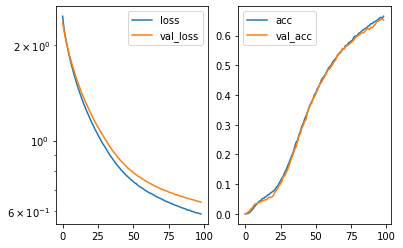

Predicted cell: NonMatureP1 Probability: [[0.9501963]]
True Cell type: NonMatureP1
X [[0.44888502]]
True positional value X 0.5
Y [[0.57113075]]
True positional value Y 0.3148148148148148
H [[0.42638296]]
True positional value H 0.5
W [[0.39614853]]
True positional value W 0.46296296296296297
C [[0.6584072]]
True positional value C 1.0


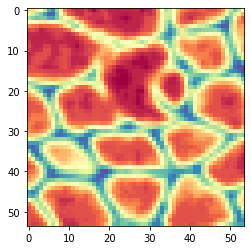

Epoch 100/250
36076/36076 [==============================] - 22s 602us/step - loss: 0.5860 - acc: 0.6685 - val_loss: 0.6403 - val_acc: 0.6619

Epoch 00100: saving model to /data/u934/service_imagerie/v_kapoor/FinalONEATTraining/Bin2ONeatModelV1/OSnetbin2d38V1f48.h5
{'val_loss': 0.640326267075953, 'val_acc': 0.6619273367651266, 'loss': 0.5860286155400222, 'acc': 0.668533098454459, 'lr': 1e-06}


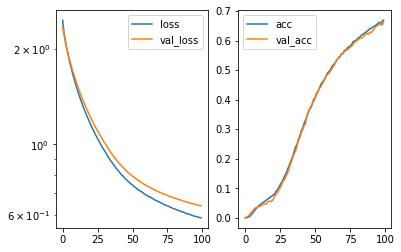

Predicted cell: Normal Probability: [[0.9595227]]
True Cell type: Normal
X [[0.50570726]]
True positional value X 0.5
Y [[0.519704]]
True positional value Y 0.5
H [[0.4973306]]
True positional value H 0.3333333333333333
W [[0.50218076]]
True positional value W 0.4444444444444444
C [[0.5880635]]
True positional value C 1.0


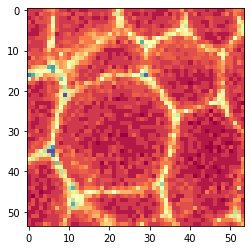

Epoch 101/250
 1600/36076 [>.............................] - ETA: 20s - loss: 0.5941 - acc: 0.6419

In [ ]:
Train = NEATStaticDetection(config, NpzDirectory,KeyCategories, KeyCord,TrainModelName,ValidationModelName, ModelDir, Model_Name, show = show, yoloV0 = yoloV0)

Train.loadData()

Train.TrainModel()
